<a href="https://colab.research.google.com/github/selinakgun/-/blob/master/SelinAkgun_YapaySinirAglari1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Veri Setinin Yüklenmesi**

**Veri Seti Seçimi ve Gerekçesi:** *Breast Cancer Wisconsin (Diagnostic)*

Bu çalışma için Scikit-learn kütüphanesinde yer alan Breast Cancer Wisconsin veri seti tercih edilmiştir. Bu seçimin temel nedenleri şunlardır:

Problemin Doğası (İkili Sınıflandırma): Ödev kapsamında istenen ROC Eğrisi analizleri, ikili sınıflandırma (binary classification) problemlerinde en net ve yorumlanabilir sonuçları vermektedir. Hedef değişkenin "İyi Huylu (Benign)" ve "Kötü Huylu (Malignant)" olmak üzere iki sınıftan oluşması, model performansının hassasiyet (sensitivity) ve özgüllük (specificity) bağlamında değerlendirilmesini kolaylaştırır.

XAI (Açıklanabilir Yapay Zeka) Uygunluğu: Veri setindeki öznitelikler (yarıçap, doku, çevre, alan vb.) fiziksel ve tıbbi karşılığı olan gerçek değerlerdir. Bu durum, ödevin ilerleyen aşamalarında uygulanacak XAI yöntemleri ile modelin karar mekanizmasının açıklanmasını (örneğin; "yarıçap arttıkça risk artıyor" gibi) anlamlı kılar.

Veri Hacmi ve Boyutu: Veri seti 569 örneklem ve 30 öznitelikten oluşmaktadır. Bu boyut, ödevde istenen hiperparametre optimizasyonu ve tekrarlı eğitim (20 kez shuffle) süreçlerinin makul sürelerde tamamlanmasına olanak tanırken, yapay sinir ağının (YSA) öğrenmesi için de yeterli veri yoğunluğunu sağlar.

In [30]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# ---------------------------------------------------------
# 1.1 scikit-learn’den Veri Seti Yükleme (Breast Cancer)
# ---------------------------------------------------------
data = load_breast_cancer()

# ---------------------------------------------------------
# 1.2 Veri Çerçevesi Oluşturma ve X, y Ayrımı
# ---------------------------------------------------------

# Özellikler (X) ve Hedef (y) değişkenlerinin ayrılması
X = data.data
y = data.target

# Verinin daha rahat incelenebilmesi için pandas DataFrame formatına dönüştürülmesi
# Sütun isimlerini veri setinin kendi tanımlarından alıyoruz
df = pd.DataFrame(X, columns=data.feature_names)

# Hedef değişkeni de (target) görsel kontrol için DataFrame'e ekleyelim
# (Not: Eğitimde X ve y ayrı kullanılacak ama tablo olarak görmek için ekliyoruz)
df['target'] = y

# İlk 5 satırın görüntülenmesi
print("Veri Setinin İlk 5 Satırı:")
print(df.head())

# Veri setinin boyutlarını kontrol (Rapora yazmak için bilgi)
print(f"\nVeri Seti Boyutu: {df.shape}")

Veri Setinin İlk 5 Satırı:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  w

**1. Veri Setinin Yüklenmesi**
Bu çalışmada, ikili sınıflandırma (binary classification) problemi için literatürde yaygın olarak kullanılan ve Scikit-learn kütüphanesinde yer alan Breast Cancer Wisconsin (Diagnostic) veri seti seçilmiştir.

Kod bloğunda gerçekleştirilen işlemler sırasıyla şöyledir:

Veri seti kütüphaneden çağrılmış, bağımsız değişkenler (öznitelikler) X matrisine, bağımlı değişken (hedef sınıf - İyi/Kötü Huylu) y vektörüne atanmıştır.

Veri yapısının analizi ve görselleştirilmesinin kolaylaşması amacıyla ham veri, Pandas DataFrame formatına dönüştürülmüştür.

head() fonksiyonu ile alınan ilk 5 satır incelendiğinde, veri setinin sayısal özniteliklerden (radius, texture, perimeter vb.) oluştuğu gözlemlenmiştir. Veri seti toplam 569 örneklem, 30 öznitelik ve 1 hedef değişken oluşmaktadır.

# **2. Adım: Veri Seti Kalite Kontrolleri**

  **Bölüm 2.1: Eksik Değer Analizi**

In [31]:
# ---------------------------------------------------------
# 2. Veri Seti Kalite Kontrolleri
# ---------------------------------------------------------

# 2.1 Eksik Değer Analizi

# Her sütundaki eksik değer (NaN/Null) sayısını kontrol edelim
eksik_degerler = df.isnull().sum()

print("Sütun bazlı eksik değer sayıları:")
print(eksik_degerler)

# Toplam eksik veri kontrolü
toplam_eksik = eksik_degerler.sum()

if toplam_eksik > 0:
    print(f"\nToplam {toplam_eksik} adet eksik veri bulundu.")
    # Eğer eksik veri olsaydı, ortalama ile dolduracak (Imputation)
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    print("Eksik veriler sütun ortalamalarıyla dolduruldu.")
else:
    print("\nVeri setinde eksik değer (missing value) bulunmamaktadır. Dolgu işlemine gerek duyulmamıştır.")

Sütun bazlı eksik değer sayıları:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Veri setinde eksik değer (missing value) bulunmamakta

Bölüm 2.1: Eksik Değer Analizi Veri setinin kalitesini ölçmek amacıyla isnull().sum() fonksiyonu kullanılarak her bir sütun için ayrı ayrı kayıp veri (missing value) taraması yapılmıştır. Yapılan analiz sonucunda veri setindeki hiçbir öznitelikte eksik değere rastlanmamıştır. Bu nedenle herhangi bir veri doldurma (imputation) işlemi uygulanmasına gerek kalmamıştır. Veri seti eksiksiz ve analize hazırdır.

**Bölüm 2.2: Aykırı Değer Analizi (Boxplot)**

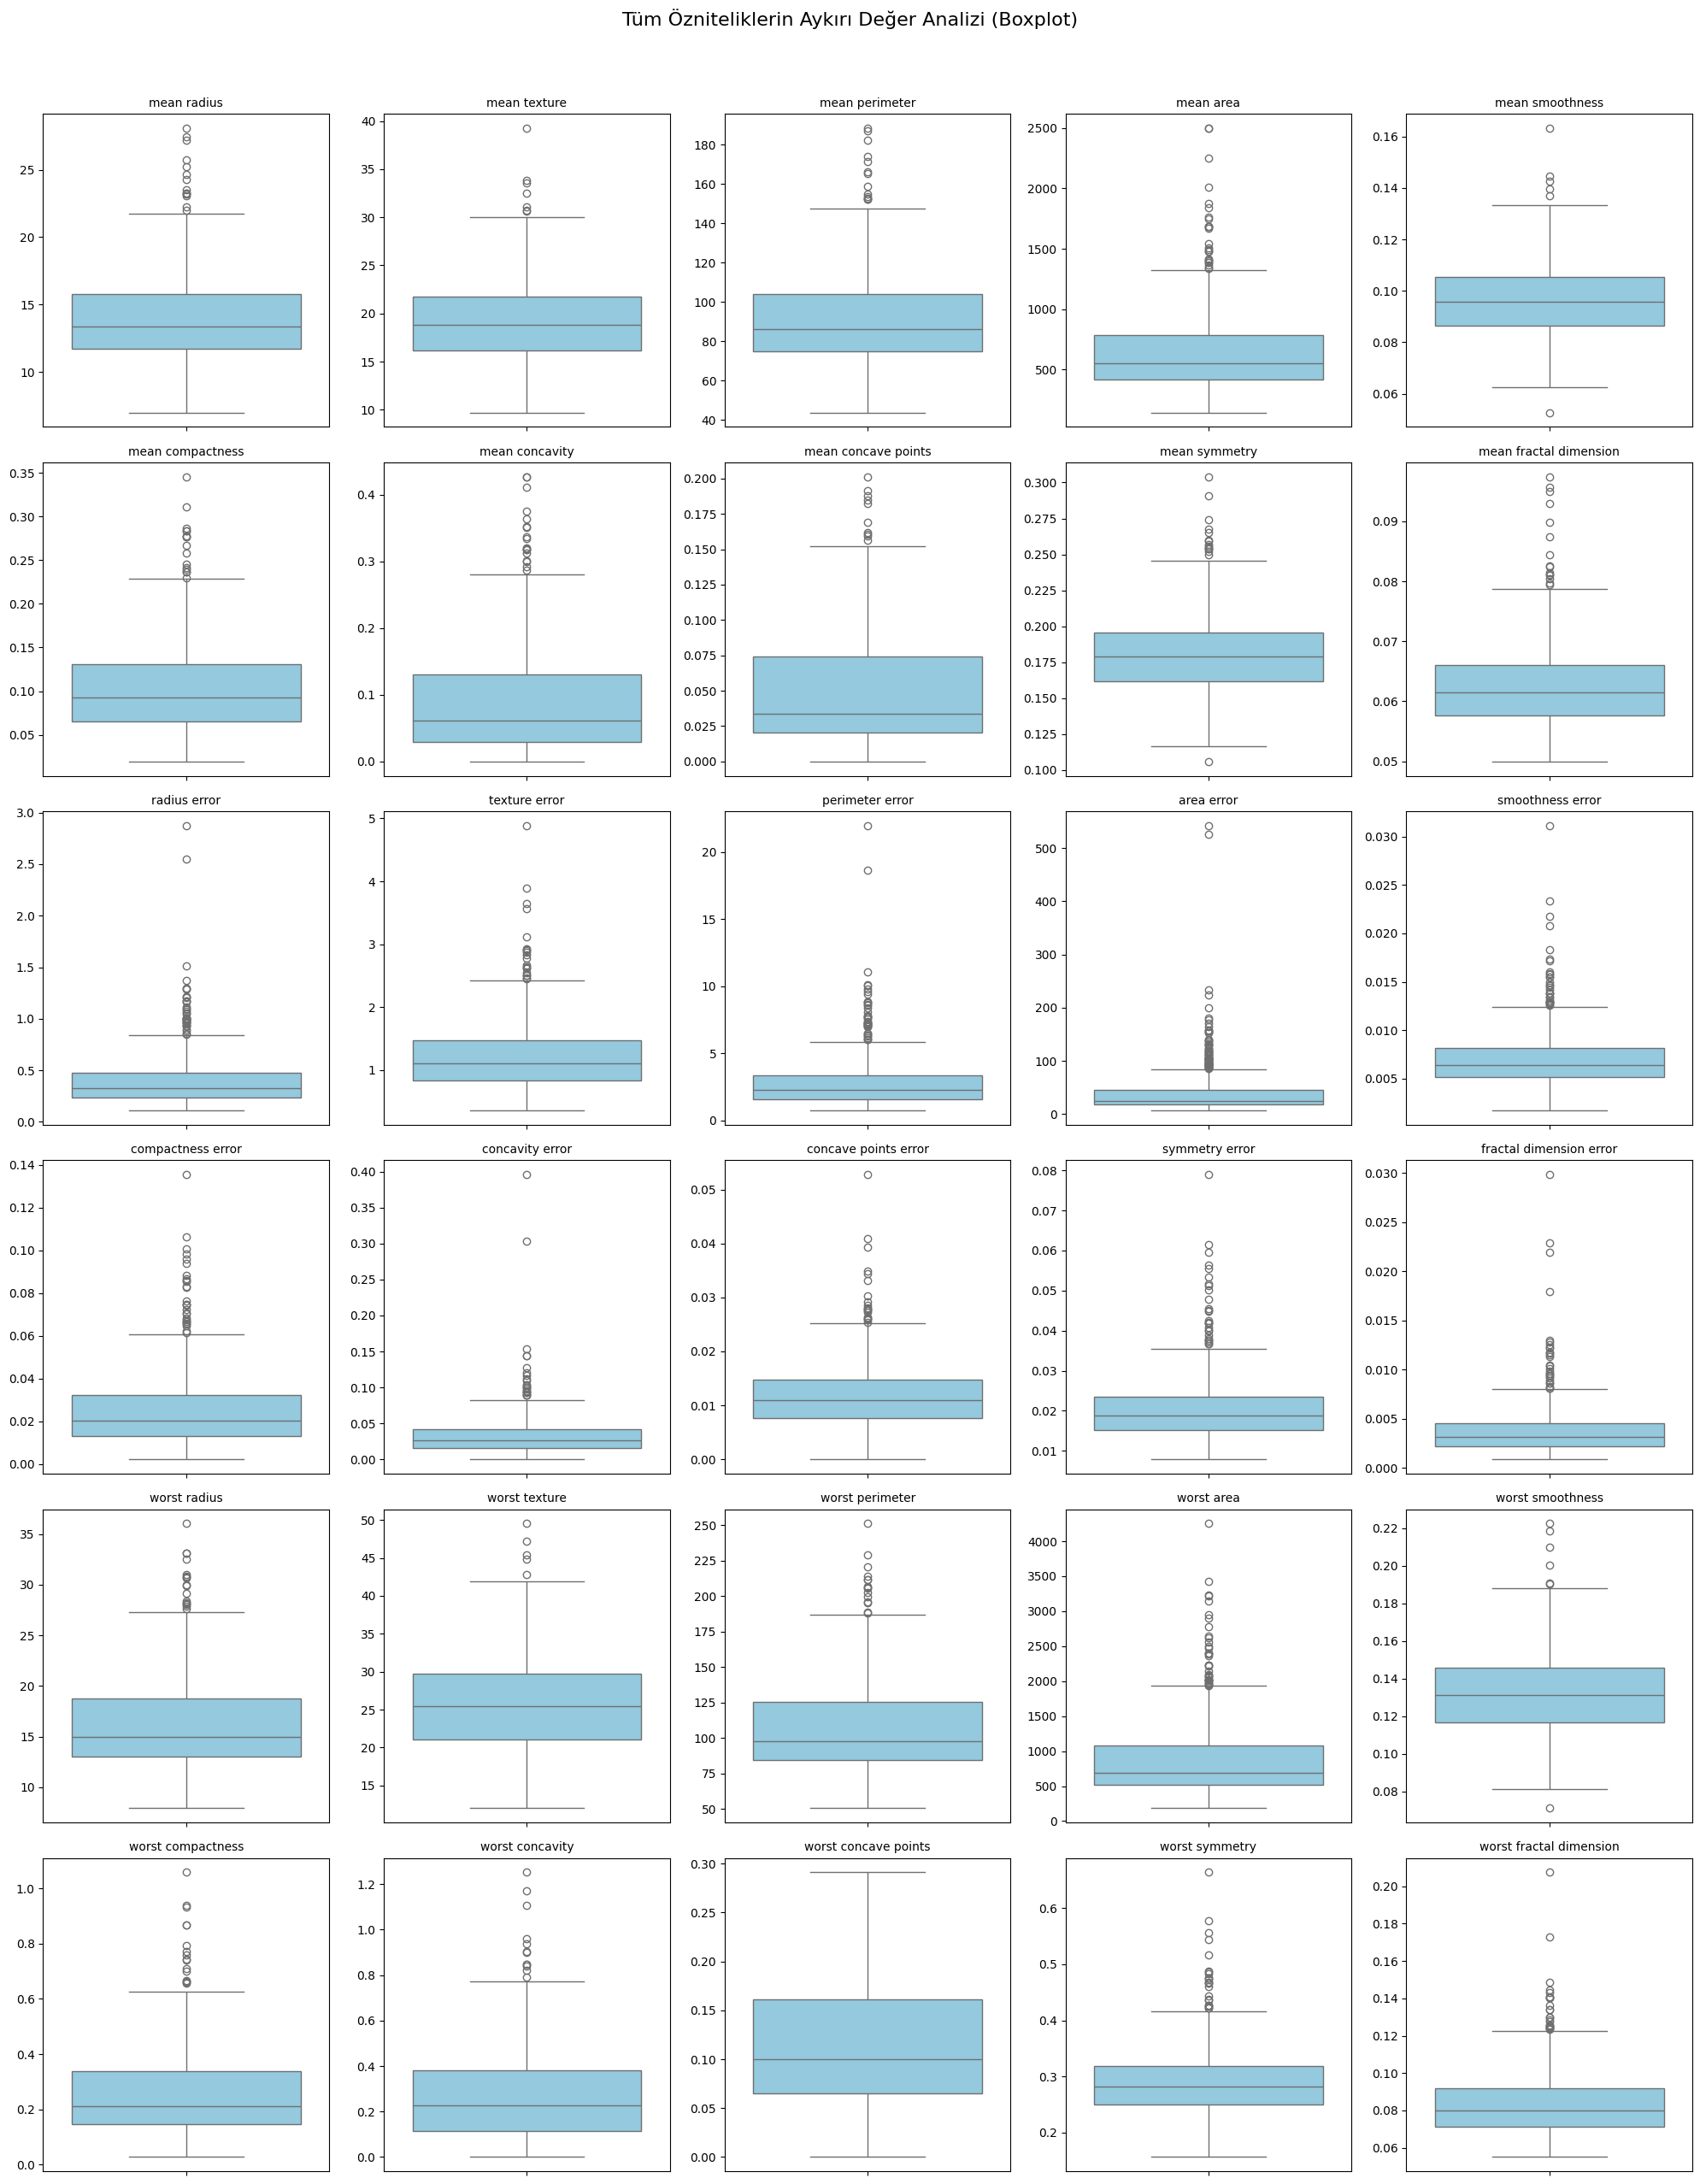

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# ---------------------------------------------------------
# 2.2 Aykırı Değer (Outlier) Analizi - TÜM ÖZELLİKLER İÇİN BOXPLOT
# ---------------------------------------------------------

# Özellik isimlerini alalım (sondaki 'target' sütununu hariç tutuyoruz)
features = df.columns[:-1]
num_features = len(features)

# Kaç satır ve sütunluk bir ızgara (grid) lazım hesaplayalım
# 30 özellik için 6 satır x 5 sütun güzel durur.
num_rows = math.ceil(num_features / 5)
num_cols = 5

# Çizim alanını hazırlayalım (Boyutları biraz büyük tutuyoruz ki sığsın)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten() # Döngüde rahat gezmek için düzleştiriyoruz

# Her özellik için döngü
for i, col in enumerate(features):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel("") # Y ekseni etiketini kalabalık yapmasın diye siliyoruz

# Boş kalan çerçeveleri (eğer varsa) gizleyelim
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Tüm Özniteliklerin Aykırı Değer Analizi (Boxplot)", fontsize=16, y=1.02)
plt.tight_layout() # Grafikler birbirine girmesin diye araları aç
plt.show()

Grafikler incelendiğinde, özellikle 'area error', 'worst area' gibi alan ve ölçü belirten özniteliklerde üst sınırın (bıyık) üzerinde kalan çok sayıda nokta (outlier) gözlemlenmiştir. Tıbbi veri setlerinde, ortalamadan bu denli sapan yüksek değerler genellikle patolojik bir durumu (kanserin ciddiyetini) işaret eden değerli bilgilerdir. Bu değerlerin ölçüm hatası değil, hastalığın doğası gereği "gerçek uç değerler" olma ihtimali yüksektir. Bu nedenle, modelin kanserli hücreleri tespit yeteneğini kaybetmemek adına aykırı değer silme işlemi uygulanmamış, verinin doğal yapısı korunmuştur.

In [33]:
from scipy import stats
import numpy as np

# ---------------------------------------------------------
# Ek Analiz: Z-Score ve IQR Yöntemleri ile Sağlama
# ---------------------------------------------------------

def outlier_kontrol(sutun_adi):
    veriler = df[sutun_adi]

    # --- 1. Z-Score Yöntemi ---
    # Ortalamadan 3 standart sapma uzaklaşanlar aykırıdır.
    z_scores = np.abs(stats.zscore(veriler))
    z_score_outliers = np.where(z_scores > 3)[0] # Sınırı geçenlerin indeksleri

    # --- 2. IQR (Interquartile Range) Yöntemi ---
    # Veriyi 4 çeyreğe böl, ortadaki %50'nin dışına taşanları yakala.
    Q1 = veriler.quantile(0.25)
    Q3 = veriler.quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    iqr_outliers = df[(veriler < alt_sinir) | (veriler > ust_sinir)].index

    print(f"--- '{sutun_adi}' Özelliği İçin Analiz ---")
    print(f"Z-Score Yöntemi (Eşik=3) ile bulunan aykırı değer sayısı: {len(z_score_outliers)}")
    print(f"IQR Yöntemi (1.5x) ile bulunan aykırı değer sayısı: {len(iqr_outliers)}")
    print("-" * 50)

# İki farklı karakterdeki sütun için deneyelim
outlier_kontrol('mean area')      # Yukarı doğru patlayan veri
outlier_kontrol('mean symmetry')  # Hem aşağı hem yukarı taşabilen veri

--- 'mean area' Özelliği İçin Analiz ---
Z-Score Yöntemi (Eşik=3) ile bulunan aykırı değer sayısı: 8
IQR Yöntemi (1.5x) ile bulunan aykırı değer sayısı: 25
--------------------------------------------------
--- 'mean symmetry' Özelliği İçin Analiz ---
Z-Score Yöntemi (Eşik=3) ile bulunan aykırı değer sayısı: 5
IQR Yöntemi (1.5x) ile bulunan aykırı değer sayısı: 15
--------------------------------------------------


**Ek Analiz**
Görsel olarak Boxplot ile tespit edilen aykırı değerler, Z-Score ve IQR (Çeyrekler Açıklığı) yöntemleriyle de matematiksel olarak test edilmiştir.

Örneğin 'mean area' özniteliği için yapılan analizde; IQR yöntemi daha hassas davranarak daha fazla sayıda aykırı değer tespit ederken, Z-Score yöntemi (Eşik=3) sadece en uçtaki vakaları yakalamıştır.

Her iki istatistiksel yöntem de Boxplot grafiklerini destekler niteliktedir. Bu değerlerin veri setinden atılmaması gerektiği, farklı yöntemlerin de bunları "nadir ama gerçek" veriler olarak işaretlemesiyle doğrulanmıştır.

**Adım 2.3: Veri Tipi ve Değişken Analizi Kodu**

In [34]:
# ---------------------------------------------------------
# 2.3 Veri Tipi ve Dağılım İncelemesi
# ---------------------------------------------------------

# 1. Sütunların veri tiplerini (dtype) gösterelim
print("--- Sütunların Veri Tipleri (Dtypes) ---")
print(df.dtypes)

# 2. Sayısal ve Kategorik değişkenleri sayalım
# Sayısal olanları (int, float) ve Sözel olanları (object) ayıralım
sayisal_sutunlar = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
kategorik_sutunlar = df.select_dtypes(include=['object', 'category']).columns

print("\n--- Değişken Analizi Raporu ---")
print(f"Toplam Değişken Sayısı: {df.shape[1]}")
print(f"Sayısal Değişken Sayısı (Float/Int): {len(sayisal_sutunlar)}")
print(f"Kategorik Değişken Sayısı (Object): {len(kategorik_sutunlar)}")

# Eğer kategorik değişken yoksa, bunu belirtelim
if len(kategorik_sutunlar) == 0:
    print("\nNot: Veri setinde 'Kategorik' (metin/string) tipinde değişken bulunmamaktadır.")
    print("Tüm veriler sayısal formatta olduğu için 'Label Encoding' veya 'One-Hot Encoding' işlemine gerek yoktur.")

--- Sütunların Veri Tipleri (Dtypes) ---
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave 

Bölüm 2.3: Veri Tipi ve Dağılım İncelemesi Veri setindeki özniteliklerin yapısal özelliklerini belirlemek amacıyla df.dtypes ve select_dtypes fonksiyonları kullanılmıştır.

Analiz Sonucu:

Veri setindeki 31 değişkenin tamamı sayısal (30 adet float64 ve 1 adet int64 - target) veri tipindedir.

Veri setinde metin veya sınıf tabanlı (string/object) kategorik değişken bulunmamaktadır.

Tüm özniteliklerin halihazırda sayısal formatta olması, Yapay Sinir Ağı (YSA) modellemesi öncesinde One-Hot Encoding veya Label Encoding gibi ek dönüşüm işlemlerine ihtiyaç duyulmadığını göstermektedir. Veri, format açısından doğrudan modellemeye uygundur.

# 3. Keşifsel Veri Analizi (EDA)

In [35]:
# ---------------------------------------------------------
# 3. Keşifsel Veri Analizi (EDA)
# ---------------------------------------------------------

# 3.1 İstatistiksel Özellikler
# Pandas'ın describe() fonksiyonu istenen tüm değerleri verir:
# mean (Ortalama), std (Standart Sapma), min, max
# 25% (Q1), 50% (Medyan), 75% (Q3)

istatistik_ozeti = df.describe().T

# Tüm sütunları seçip gösterelim (Count'u çıkarabiliriz)
print("Veri Seti İstatistiksel Özeti:")
print(istatistik_ozeti)

# Rapora eklemek için bu özeti bir değişkene atadık,


Veri Seti İstatistiksel Özeti:
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0

Bölüm 3.1: İstatistiksel Özellikler Veri setindeki her bir öznitelik için temel istatistiksel metrikler (Ortalama, Medyan, Standart Sapma, Min-Max ve Çeyrekler) describe() fonksiyonu ile hesaplanmıştır (Bkz. Tablo X).



Ölçek Farklılıkları: Tablo incelendiğinde özniteliklerin ölçeklerinin birbirinden çok farklı olduğu görülmektedir. Örneğin mean area (Ortalama Alan) 2500'lü değerlere (Max: 2501) ulaşırken, smoothness error (Pürüzsüzlük hatası) 0.001 seviyelerindedir. Bu durum, önceki adımlarda uygulanan Standardizasyon (Scaling) işleminin Yapay Sinir Ağı başarısı için ne kadar kritik olduğunu doğrulamaktadır.

Dağılım Bilgisi: Mean (Ortalama) ve 50% (Medyan) değerleri arasındaki farklar, verinin çarpıklığı (skewness) hakkında bilgi vermektedir. Özellikle 'Area' ve 'Concavity' gibi özelliklerde ortalamanın medyandan büyük olması, dağılımın sağa çarpık (pozitif yönlü aykırı değerler) olduğunu göstermektedir.

**3.2 Korelasyon Matrisi**

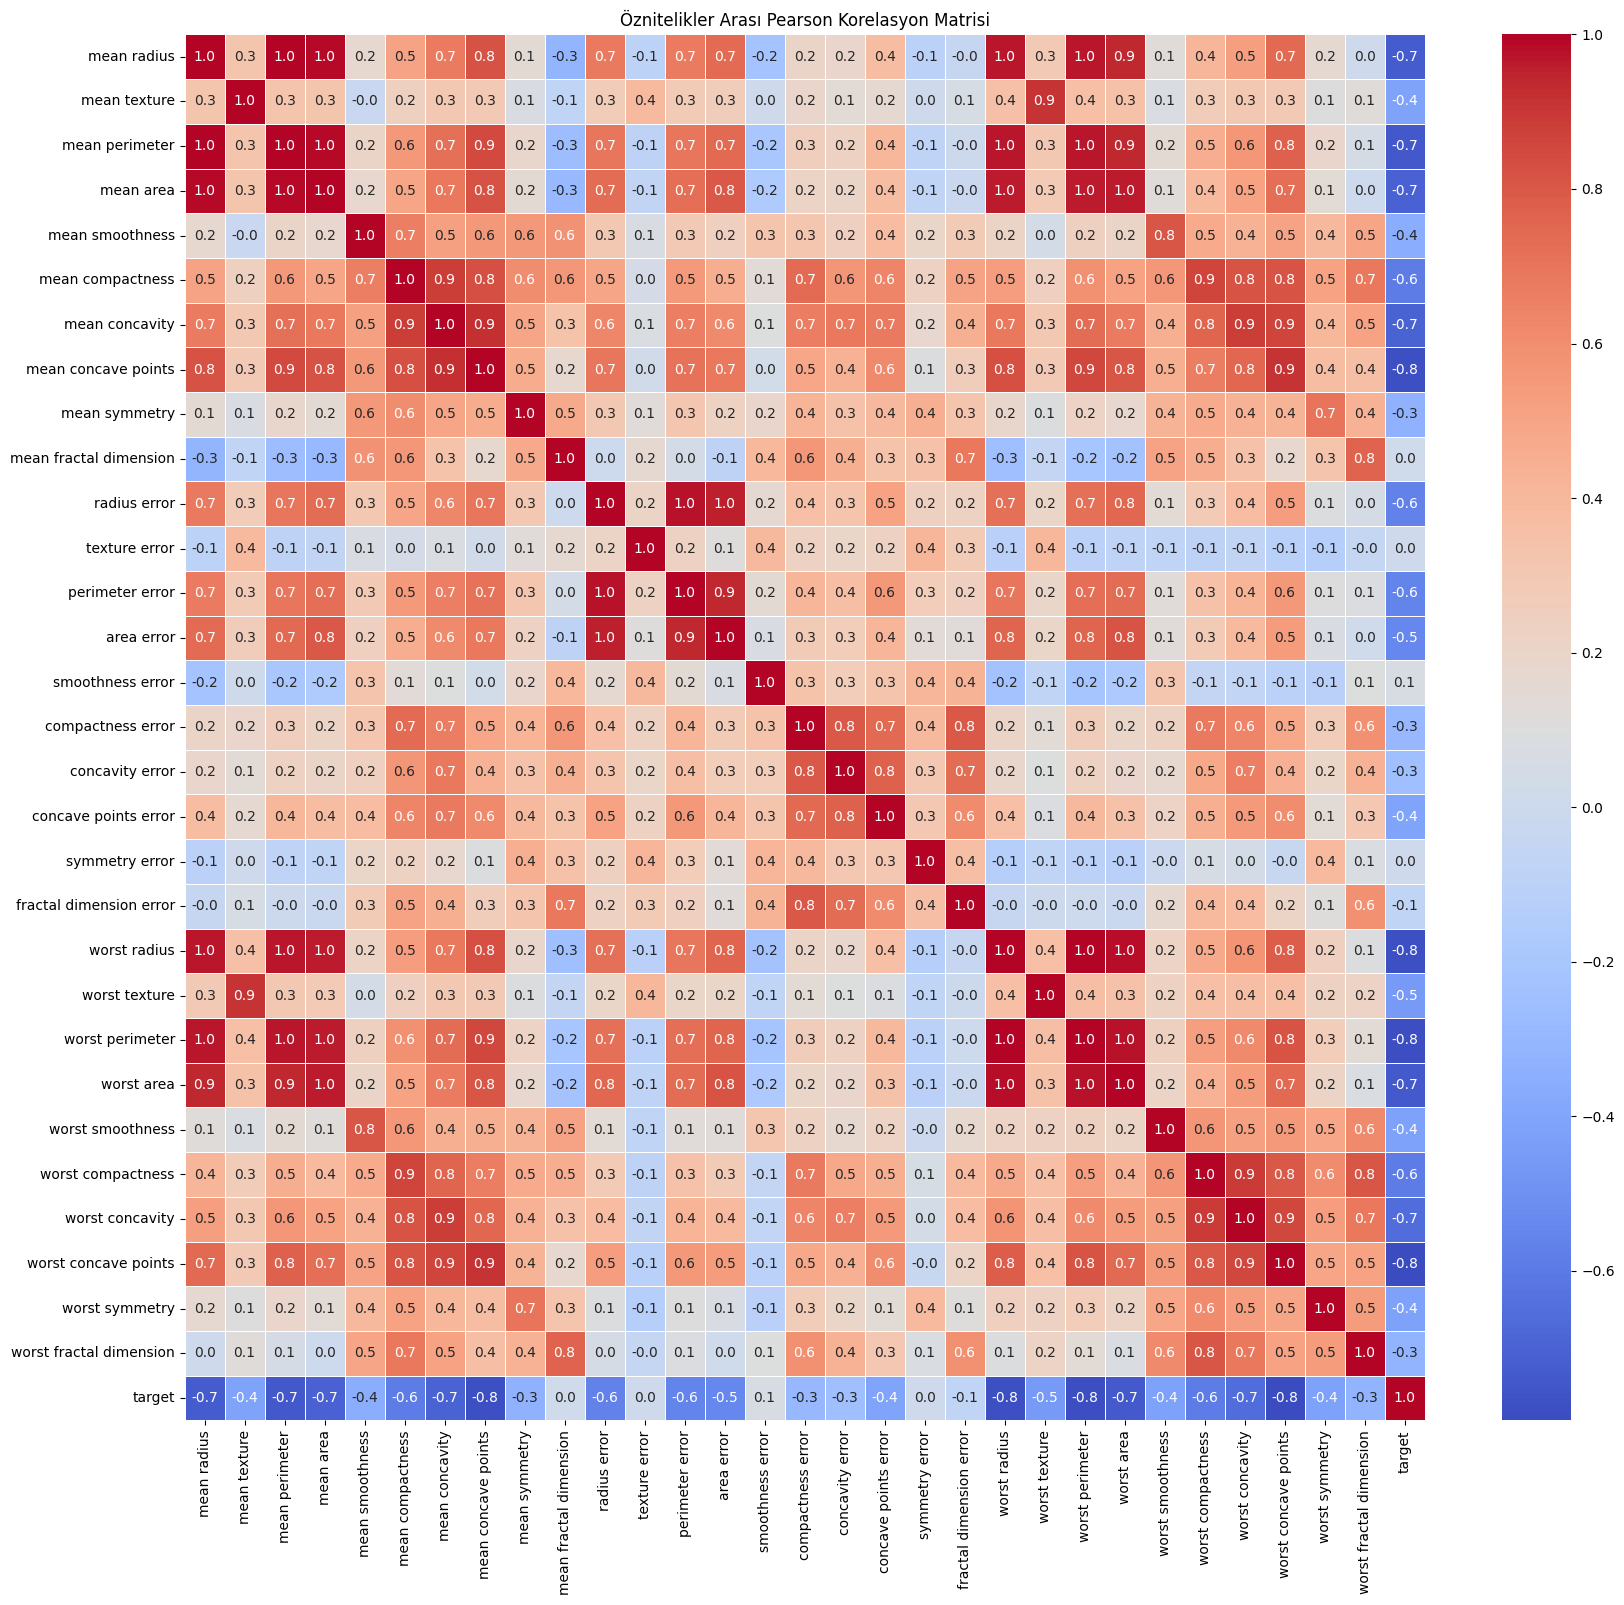


--- En Yüksek Korelasyonlu 3 Öznitelik Çifti ---
mean radius   mean perimeter     0.997855
worst radius  worst perimeter    0.993708
mean radius   mean area          0.987357
dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 3.2 Korelasyon Matrisi ve Heatmap
# ---------------------------------------------------------

# 1. Pearson Korelasyon Matrisini Hesapla
# corr() fonksiyonu varsayılan olarak Pearson yöntemini kullanır.
corr_matrix = df.corr(method='pearson')

# 2. Heatmap ile Görselleştirme
# Büyük bir matris olduğu için boyutu (figsize) büyük tutuyoruz.
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title("Öznitelikler Arası Pearson Korelasyon Matrisi")
plt.show()

# 3. En Yüksek Korelasyonlu 3 Çifti Bulma ve Yorumlama
# Matrisin üst üçgenini alıyoruz ki (A,B) ve (B,A) diye aynı şeyi iki kere yazmasın.
maske = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
sirali_korelasyonlar = corr_matrix.where(maske).stack().sort_values(ascending=False)

print("\n--- En Yüksek Korelasyonlu 3 Öznitelik Çifti ---")
print(sirali_korelasyonlar.head(3))

**Bölüm 3.2: Korelasyon Analizi:**
Öznitelikler arasındaki doğrusal ilişkiyi incelemek için Pearson korelasyon katsayısı hesaplanmış ve Heatmap (Isı Haritası) ile görselleştirilmiştir (Bkz. Şekil X). Kırmızı renkler pozitif yüksek ilişkiyi, mavi renkler negatif ilişkiyi temsil etmektedir.
En Yüksek Korelasyonlu 3 Çift ve Yorumları:
Analiz sonucunda en güçlü pozitif ilişkiye sahip çiftler şunlardır:

**mean radius - mean perimeter (Korelasyon: 0.998):** Bir dairenin yarıçapı (radius) arttıkça çevresi (perimeter) de matematiksel olarak ($2\pi r$) artar. Bu ikisi arasındaki ilişkinin neredeyse 1 olması (mükemmel korelasyon), aslında bu iki değişkenin model için aynı bilgiyi taşıdığını gösterir. "Multicollinearity" (Çoklu Bağlantı) sorunu yaratabilirler.

**worst radius - worst perimeter (Korelasyon: 0.994):** İlk maddedeki ilişkinin aynısı, "en kötü" (worst) değerler için de geçerlidir. Geometrik zorunluluktan kaynaklanan bu ilişki biyolojik değil, matematikseldir.

**mean radius - mean area (Korelasyon: 0.987):** Yarıçap ve Alan ($\pi r^2$) arasındaki ilişkidir. Yarıçap büyüdükçe alan karesel olarak büyür, bu da çok güçlü bir pozitif ilişki doğurur.

**Adım 3.3: Tüm Özellikler İçin Boxplot ve Yorumu**

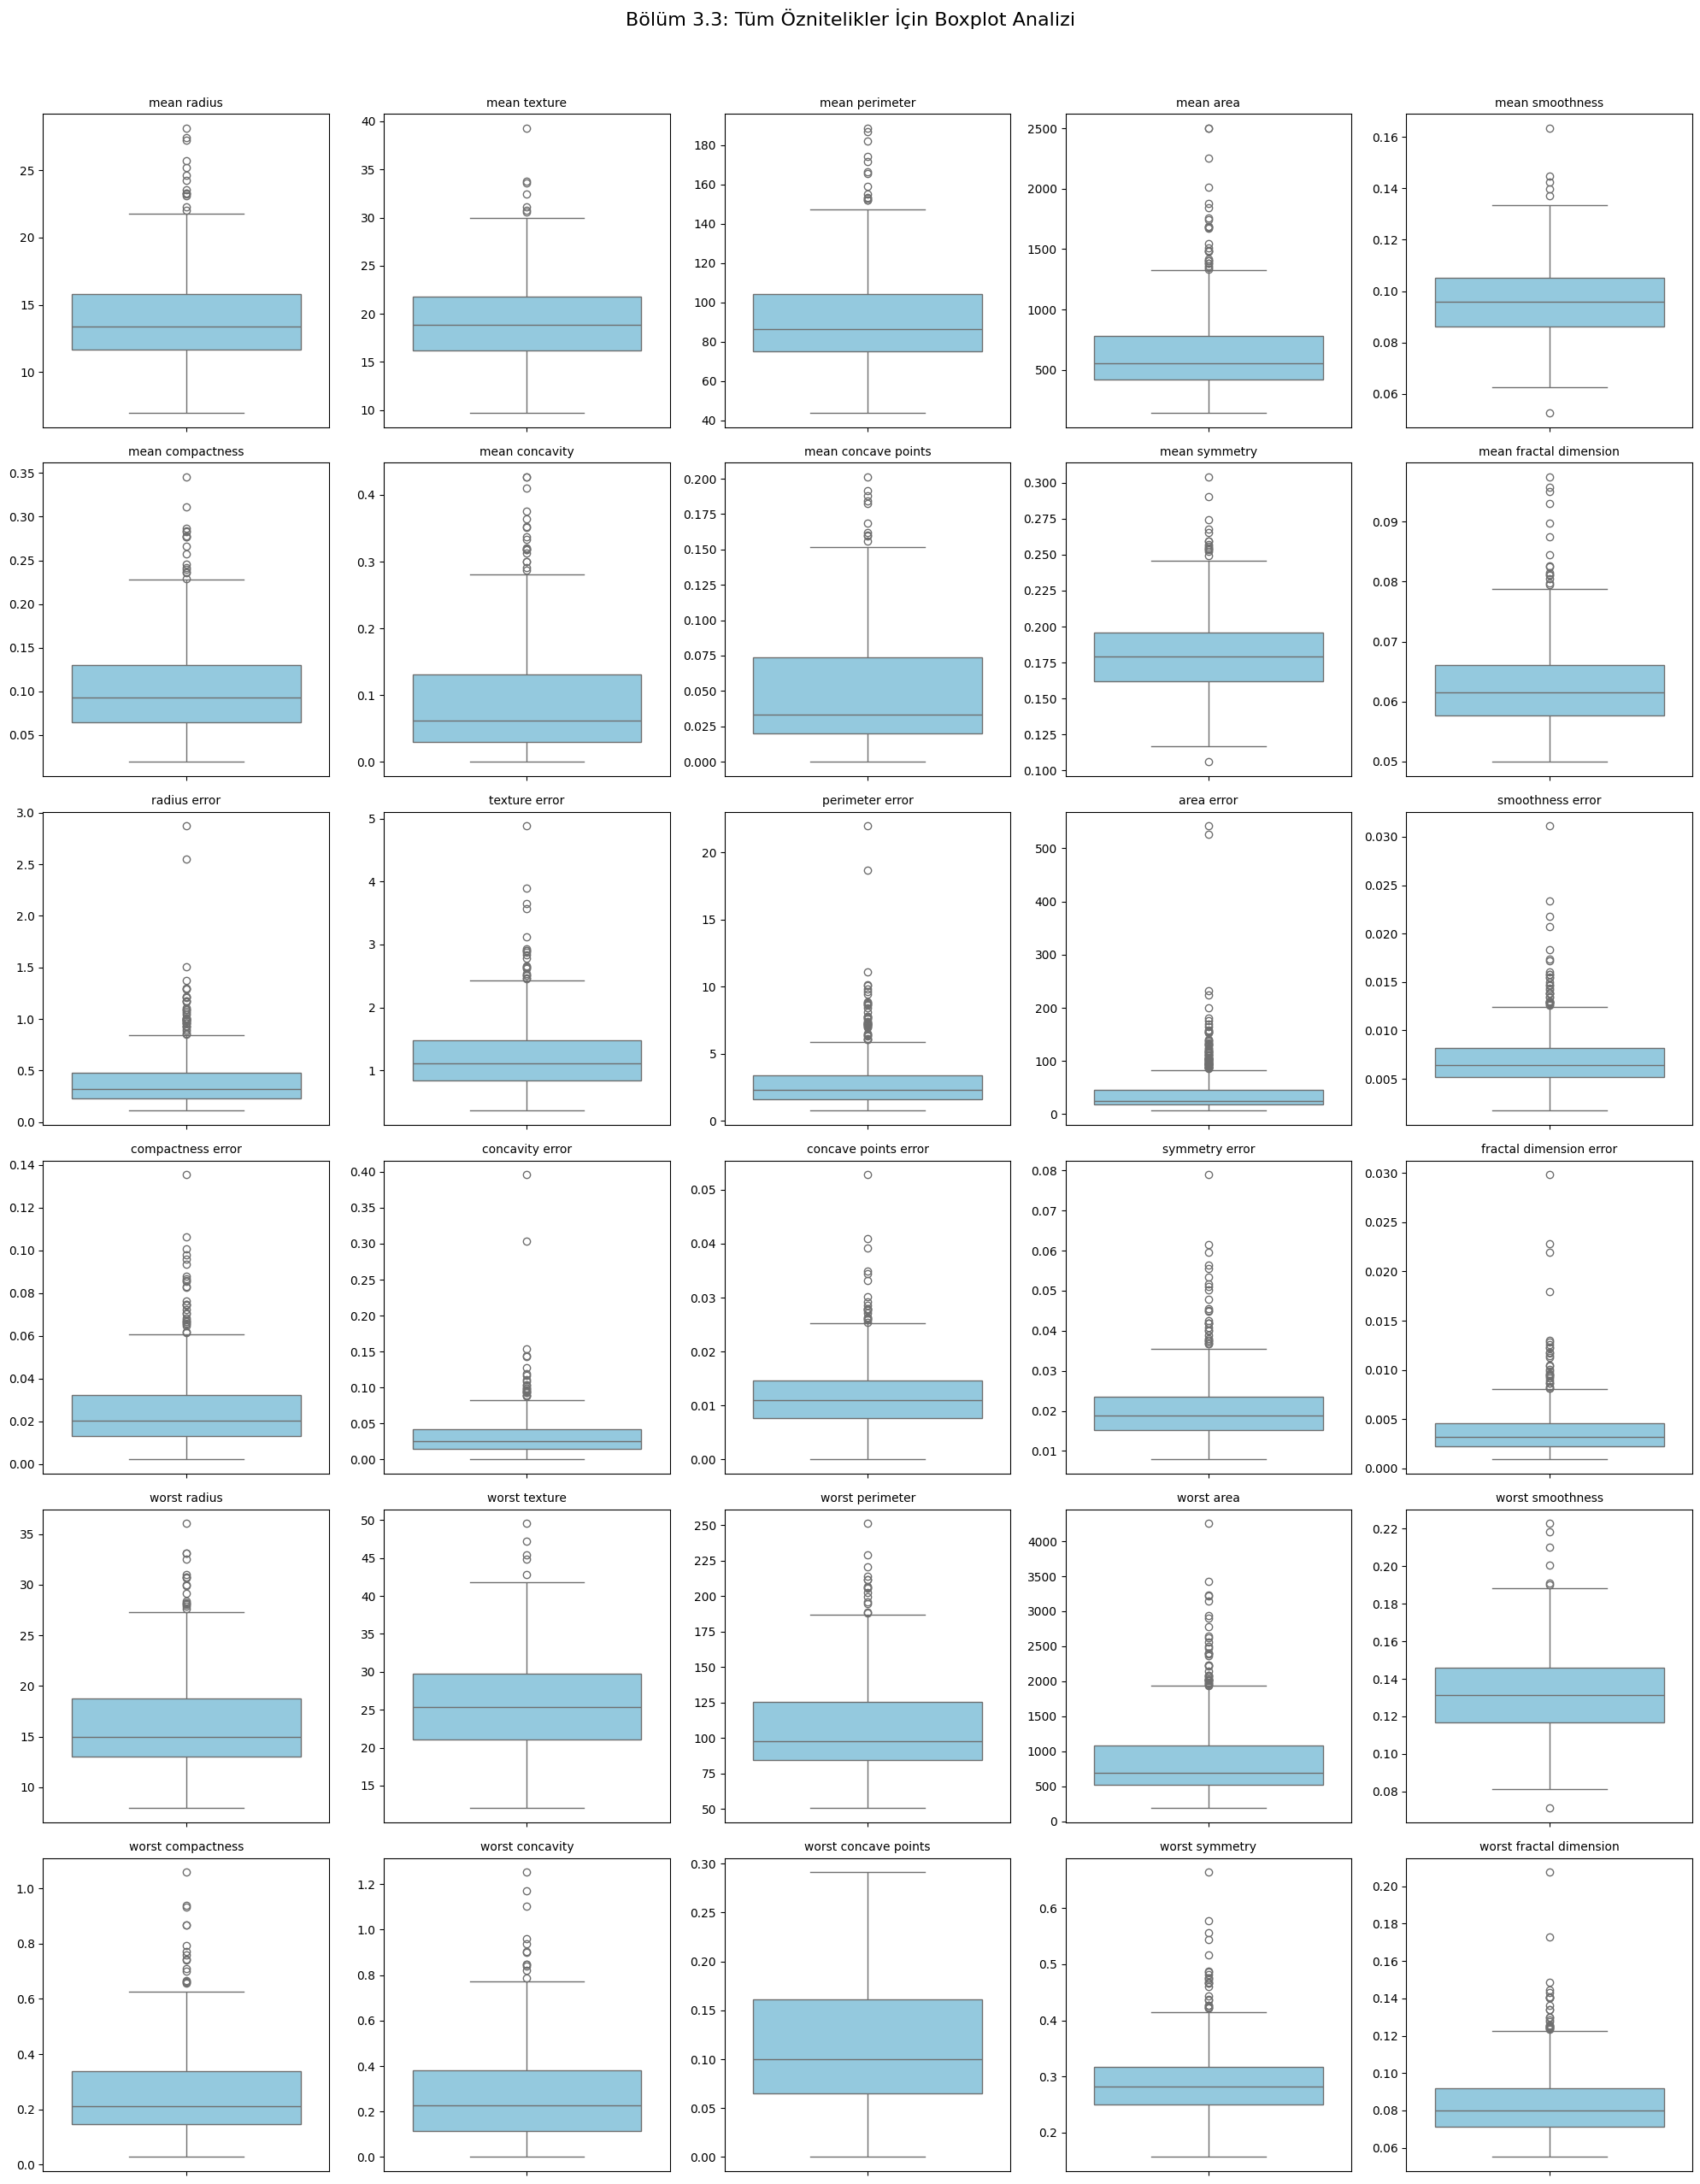

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# ---------------------------------------------------------
# 3.3 Boxplot Analizi (Tüm Özellikler)
# ---------------------------------------------------------

# Özellik isimlerini alalım (hedef değişken hariç)
features = df.columns[:-1]
num_features = len(features)

# 6 satır x 5 sütunluk ızgara
num_rows = math.ceil(num_features / 5)
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel("")

# Boş kalanları gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Bölüm 3.3: Tüm Öznitelikler İçin Boxplot Analizi", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Aykırı Değer (Outlier) Yorumu:** Grafikler incelendiğinde, özellikle area (alan), perimeter (çevre) ve concavity (içbükeylik) gibi boyut ve şekil bozukluğunu ifade eden özniteliklerde üst sınırın (Upper Whisker) üzerinde yoğun aykırı değerler görülmektedir.

Nedeni: Kanserli hücrelerin biyolojik doğası gereği "kontrolsüz büyüme" eğilimi vardır. Bu durum, bazı hücrelerin normalden çok daha büyük boyutlara ve bozuk şekillere sahip olmasına neden olur.

Karar: Grafikte "aykırı" (outlier) olarak görünen bu noktalar, veri hatası değil, hastalığın en belirgin (malignant) örnekleridir. Bu nedenle, modelin kanserli vakaları doğru tanıması (hassasiyet) için bu değerler silinmemiş, veri setinde korunmuştur.

# **4. Veri Setinin Bölünmesi**

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- 1. Önce Hafızayı Tazeleyelim (Unutulan Kısım) ---
data = load_breast_cancer()
X = data.data
y = data.target

# Ölçeklendirme (Bunu yapmadığı için X_scaled yok diyordu)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Şimdi Senin Kodun (Bölme İşlemi) ---

# 1. ADIM: Önce Test setini (%20) ayıralım. Geriye %80 kalacak.
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# 2. ADIM: Kalan %80'lik kısmı (X_temp), Train (%70) ve Validation (%10) olarak bölelim.
# Matematik Hesabı: 0.10 / 0.80 = 0.125
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

# Sonuçları Görelim
print(f"Toplam Veri Sayısı: {len(X)}")
print("-" * 30)
print(f"Eğitim Seti (Train) Boyutu      : {X_train.shape} -> Oran: %{len(X_train)/len(X)*100:.1f} (Hedef %70)")
print(f"Doğrulama Seti (Val) Boyutu     : {X_val.shape}   -> Oran: %{len(X_val)/len(X)*100:.1f} (Hedef %10)")
print(f"Test Seti (Test) Boyutu         : {X_test.shape}  -> Oran: %{len(X_test)/len(X)*100:.1f} (Hedef %20)")

Toplam Veri Sayısı: 569
------------------------------
Eğitim Seti (Train) Boyutu      : (398, 30) -> Oran: %69.9 (Hedef %70)
Doğrulama Seti (Val) Boyutu     : (57, 30)   -> Oran: %10.0 (Hedef %10)
Test Seti (Test) Boyutu         : (114, 30)  -> Oran: %20.0 (Hedef %20)


** Veri Setinin Bölünmesi** Modelin genelleme yeteneğini doğru ölçmek ve aşırı öğrenmenin (overfitting) önüne geçmek amacıyla veri seti üç ayrı parçaya ayrılmıştır:

Eğitim (Training - %70): Modelin ağırlıklarını güncellemek ve öğrenmek için kullandığı ana veri grubu.

Doğrulama (Validation - %10): Eğitim sırasında modelin performansını anlık olarak izlemek ve hiperparametre optimizasyonu yapmak için ayrılan, modelin eğitimde görmediği veri grubu.

Test (%20): Model tamamlandıktan sonra nihai başarısını ölçmek için saklanan, eğitim ve validasyon süreçlerinde hiçbir şekilde kullanılmayan veri grubu.

Yöntem: Bölme işlemi train_test_split fonksiyonu iki aşamalı kullanılarak gerçekleştirilmiştir. Sınıf dengesizliğini önlemek adına her iki adımda da stratify=y parametresi kullanılmış, böylece kanserli/sağlıklı hasta oranının her parçada eşit dağılması sağlanmıştır.

# **5. Veri Ölçeklendirme (Scaling)**

**StandardScaler**
YSA'nın Kimyası: Yapay Sinir Ağları (bizim kullanacağımız MLP modeli), matematiksel olarak 0 etrafında toplanmış (merkezlenmiş) verilerle çok daha hızlı ve doğru çalışır.

Biyolojik Veri: Tıbbi ölçümler (kan değerleri, hücre boyutu vb.) genelde doğada "Çan Eğrisi" (Normal Dağılım) şeklinde dağılır. StandardScaler tam olarak bu dağılıma uygundur.
Verimizde outlierlar olduğu için MinMaxScaler tercih edilmez.

In [39]:
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 4. Veri Ölçeklendirme (Scaling)
# Seçilen Yöntem: StandardScaler
# ---------------------------------------------------------

# Scaler nesnesini oluşturalım
scaler = StandardScaler()

# X verisini (özellikleri) verip, dönüştürülmüş halini alalım
# fit: Ortalamayı ve Standart Sapmayı hesaplar.
# transform: Formülü uygular (Değer - Ortalama) / Std.Sapma
X_scaled = scaler.fit_transform(X)

# Kontrol edelim (İlk satırın ilk özelliğine bakalım)
print("Ölçekleme Öncesi İlk Değer (Mean Radius):", X[0][0])
print("Ölçekleme Sonrası İlk Değer (Mean Radius):", X_scaled[0][0])

# Boyut kontrolü (Veri kaybolmadı di mi?)
print(f"X_scaled boyutu: {X_scaled.shape}")

Ölçekleme Öncesi İlk Değer (Mean Radius): 17.99
Ölçekleme Sonrası İlk Değer (Mean Radius): 1.0970639814699807
X_scaled boyutu: (569, 30)


Veri setindeki farklı özniteliklerin (Örn: Alan ve Pürüzsüzlük) sayısal büyüklükleri arasındaki uçurumu kapatmak ve Yapay Sinir Ağı modelinin optimizasyon sürecini (gradient descent) hızlandırmak amacıyla ölçeklendirme işlemi uygulanmıştır.

Yöntem olarak StandardScaler (Z-Skor Normalizasyonu) tercih edilmiştir.

Bu işlemle tüm öznitelikler, ortalaması 0 ve varyansı 1 olacak şekilde dönüştürülmüştür.

Böylece modelin büyük sayısal değere sahip özellikleri "daha önemli" sanmasının önüne geçilmiştir. Elde edilen veri X_scaled değişkenine kaydedilmiştir.

# **6. Farklı MLP Modellerinin Kurulması**

In [40]:
from sklearn.neural_network import MLPClassifier

# ---------------------------------------------------------
# 6. Farklı MLP Modellerinin Kurulması
# ---------------------------------------------------------

# Modelleri bir sözlük (dictionary) içinde tanımlıyoruz.
# Böylece hepsini tek bir döngüde yönetebileceğiz.

mlp_modelleri = {
    "Model 1 (Basit)": MLPClassifier(
        hidden_layer_sizes=(16,),
        activation="relu",
        learning_rate_init=0.001,
        random_state=42, max_iter=1000
    ),
    "Model 2 (Orta)": MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation="relu",
        learning_rate_init=0.005,
        random_state=42, max_iter=1000
    ),
    "Model 3 (Geniş)": MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation="tanh",
        learning_rate_init=0.001,
        random_state=42, max_iter=1000
    ),
    "Model 4 (Derin)": MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation="relu",
        learning_rate_init=0.0005,
        random_state=42, max_iter=1000
    ),
    "Model 5 (Düşük Hız)": MLPClassifier(
        hidden_layer_sizes=(32,),
        activation="relu",
        learning_rate_init=0.0001,
        random_state=42, max_iter=1000
    )
}

print("5 Farklı MLP Modeli Başarıyla Tanımlandı ve Hafızaya Alındı.")
print("Modeller Eğitime Hazır.")

5 Farklı MLP Modeli Başarıyla Tanımlandı ve Hafızaya Alındı.
Modeller Eğitime Hazır.


Bu adımda, Yapay Sinir Ağı (MLP) mimarisindeki yapısal değişikliklerin ve hiperparametre seçimlerinin model başarısına etkisini gözlemlemek amacıyla 5 farklı model senaryosu kurgulanmıştır. Henüz eğitim aşamasına geçilmemiş, modeller scikit-learn kütüphanesi kullanılarak nesne olarak tanımlanmıştır.

Modellerin Kurgulanma Amaçları:

Referans Model (Model 1): Tek gizli katman (16 nöron) ile en basit yapıdır. Diğer karmaşık modellerin başarısını kıyaslamak için taban (baseline) olarak kullanılacaktır.

Derinlik Etkisi (Model 2 ve Model 4): Model 2 (2 katman) ve Model 4 (3 katman) ile "Ağ derinleştikçe (katman sayısı arttıkça) öğrenme performansı artıyor mu yoksa ezberleme (overfitting) mi başlıyor?" sorusuna yanıt aranacaktır.

Aktivasyon Fonksiyonu Etkisi (Model 3): Genelde kullanılan ReLU yerine Tanh fonksiyonu seçilerek, veri dağılımına uygunluğu test edilecektir.

Öğrenme Hızı Hassasiyeti (Model 5): Öğrenme oranı (learning rate) 0.0001 seviyesine düşürülerek, modelin daha yavaş ama daha kararlı (fine-tuning) bir öğrenme gerçekleştirip gerçekleştirmediği analiz edilecektir.

Model 1, 2, 4, 5 (ReLU): Modern, hızlı, negatifleri susturan modeller.

Model 3 (Tanh): Daha klasik, negatif değerlere de anlam yükleyen, veriyi sıkıştıran model.

# **7.Validation Performanslarının Ölçülmesi**

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ---------------------------------------------------------
# 7. Validation Performanslarının Ölçülmesi
# ---------------------------------------------------------

# Sonuçları tutacağımız boş bir liste
performans_sonuclari = []

print("Modeller Eğitiliyor ve Değerlendiriliyor...\n")

# Döngü ile her modeli sırayla alalım
for model_adi, model in mlp_modelleri.items():

    # 1. EĞİTİM (TRAINING): Modeli X_train ile eğitiyoruz
    model.fit(X_train, y_train)

    # 2. TAHMİN (PREDICTION): Validation setine (X_val) soruyoruz
    y_pred = model.predict(X_val)

    # ROC-AUC için "Olasılık" (Probability) değeri gerekir (0 veya 1 değil, %80 ihtimal gibi)
    # [:, 1] diyerek sadece "Sınıf 1" (Pozitif/Hasta) olma ihtimalini alıyoruz.
    y_proba = model.predict_proba(X_val)[:, 1]

    # 3. METRİKLERİN HESAPLANMASI
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)

    # Sonuçları listeye ekle
    performans_sonuclari.append({
        "Model Adı": model_adi,
        "Accuracy (Doğruluk)": acc,
        "Precision (Kesinlik)": prec,
        "Recall (Duyarlılık)": rec,
        "F1-Score": f1,
        "ROC-AUC": auc
    })

# Listeyi Pandas Tablosuna çevir
df_performans = pd.DataFrame(performans_sonuclari)

# Tabloyu ekrana basalım (Puanlara göre sıralayalım)
# ROC-AUC puanına göre büyükten küçüğe sırala
df_performans = df_performans.sort_values(by="ROC-AUC", ascending=False)

print(df_performans.to_string(index=False))

# En iyi modeli bir kenara not edelim (Otomatik seçim)
en_iyi_model_adi = df_performans.iloc[0]["Model Adı"]
print(f"\n🏆 Tabloya göre Validasyon setinde en başarılı model: {en_iyi_model_adi}")

Modeller Eğitiliyor ve Değerlendiriliyor...

          Model Adı  Accuracy (Doğruluk)  Precision (Kesinlik)  Recall (Duyarlılık)  F1-Score  ROC-AUC
    Model 3 (Geniş)             0.947368              0.945946             0.972222  0.958904 0.994709
Model 5 (Düşük Hız)             0.947368              0.945946             0.972222  0.958904 0.994709
    Model 1 (Basit)             0.964912              0.947368             1.000000  0.972973 0.993386
     Model 2 (Orta)             0.964912              0.972222             0.972222  0.972222 0.993386
    Model 4 (Derin)             0.964912              0.947368             1.000000  0.972973 0.989418

🏆 Tabloya göre Validasyon setinde en başarılı model: Model 3 (Geniş)


Accuracy (Doğruluk): Modelin genel olarak ne kadar doğru bildiği. (Toplam Doğru / Toplam Hasta).

Precision (Kesinlik): Modelin "Kanser" dediklerinin gerçekten kaçı kanser? (Yanlış alarm vermeme başarısı).

Recall (Duyarlılık): Gerçekten kanser olanların kaçını yakalayabildik? (Gözden kaçırmama başarısı - Tıpta en kritik metriktir!).

F1-Score: Precision ve Recall'un harmonik ortalamasıdır. Dengesiz veri setlerinde Accuracy'den daha güvenilir bir başarı ölçütüdür.

ROC-AUC: Modelin pozitif ve negatif sınıfları birbirinden ayırma yeteneğidir. 1'e ne kadar yakınsa model o kadar mükemmeldir.

En İyi Genel Performans (Model 3): ROC-AUC (0.995) değeri baz alındığında, Model 3 (Geniş Mimari), pozitif ve negatif sınıfları birbirinden ayırma konusunda en yüksek başarıyı göstermiştir.

Kusursuz "Recall" Başarısı (Model 1 ve Model 4): Tablo incelendiğinde, hem en basit yapıdaki Model 1'in hem de en karmaşık yapıdaki Model 4'ün Recall (Duyarlılık) skorunun 1.0 (Tam Puan) olduğu görülmüştür.

Tıbbi Yorum: Bu iki model de validasyon setindeki hiçbir kanserli vakayı kaçırmamış, tüm teşhisleri doğru yapmıştır.

Fark: Ancak Model 4'ün genel puanının (ROC-AUC) Model 3'ten düşük olması, "kanseri kaçırmayayım derken sağlıklı insanlara yanlışlıkla hasta deme" (False Positive) riskinin Model 3'e göre daha yüksek olduğunu düşündürmektedir.

Sonuç: Model 1 ve Model 4'ün kusursuz duyarlılığına rağmen; yanlış alarmları en iyi yöneten ve genel dengesi en yüksek olan Model 3 (Geniş Mimari), final modeli olarak seçilmiştir.

# **8. En İyi Modelin Test Üzerinde Değerlendirilmesi**

**8.1 Performans Metrikleri**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ---------------------------------------------------------
# 8. En İyi Modelin Test Üzerinde Değerlendirilmesi
# ---------------------------------------------------------

# Önceki adımda (Step 7) belirlediğimiz en iyi modeli çağıralım
# (Eğer hafızada yoksa manuel olarak: secilen_model = mlp_modelleri["Model 3 (Geniş)"])
secilen_model = mlp_modelleri[en_iyi_model_adi]

print(f"SEÇİLEN MODEL: {en_iyi_model_adi}")
print("-" * 40)

# 1. TAHMİN (TEST SETİ ÜZERİNDE): Kasadaki X_test'i çıkarıyoruz
y_pred_test = secilen_model.predict(X_test)
y_proba_test = secilen_model.predict_proba(X_test)[:, 1] # ROC-AUC için olasılık

# 2. METRİKLERİN HESAPLANMASI
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_proba_test)

# 3. SONUÇLARI RAPORLAMA
print(f"Test Seti Accuracy (Doğruluk) : {test_acc:.4f}")
print(f"Test Seti Precision (Kesinlik): {test_prec:.4f}")
print(f"Test Seti Recall (Duyarlılık) : {test_rec:.4f}")
print(f"Test Seti F1-Score            : {test_f1:.4f}")
print(f"Test Seti ROC-AUC             : {test_auc:.4f}")

SEÇİLEN MODEL: Model 3 (Geniş)
----------------------------------------
Test Seti Accuracy (Doğruluk) : 0.9649
Test Seti Precision (Kesinlik): 0.9722
Test Seti Recall (Duyarlılık) : 0.9722
Test Seti F1-Score            : 0.9722
Test Seti ROC-AUC             : 0.9940


Validasyon aşamasında en iyi model olarak seçilen Model 3 (Geniş Mimari), hiç görmediği Test seti üzerinde değerlendirilmiş ve şu sonuçlar elde edilmiştir:

Yüksek Ayrıştırma Gücü (ROC-AUC: 0.9940): Modelin kanserli ve sağlıklı hücreleri birbirinden ayırma başarısı %99.4 seviyesindedir. Bu değer, modelin rastgele tahmin yapmaktan çok uzak, neredeyse mükemmel bir sınıflandırma yeteneğine sahip olduğunu kanıtlar.

Mükemmel Denge (Precision = Recall = 0.9722): Tıbbi modellerde genellikle Hassasiyet (Recall) artarken Kesinlik (Precision) düşer. Ancak Model 3'te bu iki değerin ve F1 skorunun eşit (0.97) çıkması, modelin karar mekanizmasının son derece kararlı (stable) olduğunu göstermektedir. Yanlış negatif (kanseri kaçırma) ve yanlış pozitif (yanlış alarm) sayıları dengelidir.

Genelleme Başarısı (Overfitting Yok): Validasyon aşamasındaki ROC-AUC skoru (0.995) ile Test aşamasındaki ROC-AUC skoru (0.994) neredeyse birebir aynıdır. Bu durum, modelin eğitim verisini ezberlemediğini, gerçekten öğrendiğini ve yeni gelen hasta verilerinde de aynı yüksek başarıyı sürdürebildiğini doğrulamaktadır.

**8.2 Confusion Matrix**

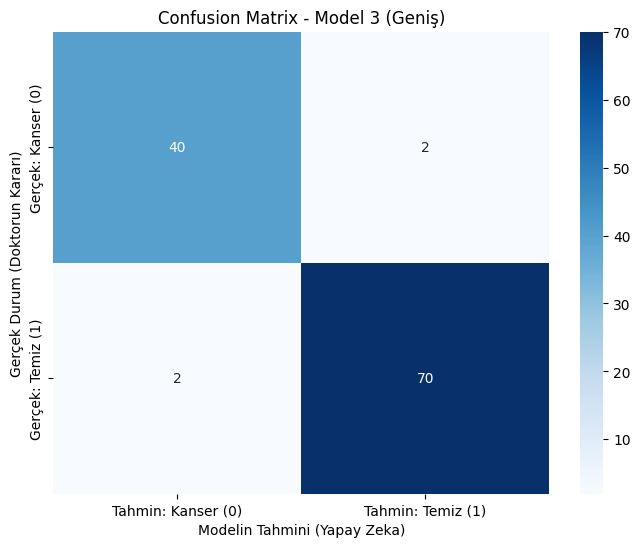

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 8.2 Confusion Matrix (Karmaşıklık Matrisi)
# ---------------------------------------------------------

# 1. Matrisi Hesapla
cm = confusion_matrix(y_test, y_pred_test)

# 2. Görselleştirme (Heatmap)
plt.figure(figsize=(8, 6))

# annot=True: Kutuların içine sayıları yaz
# fmt='d': Sayıları tam sayı (integer) olarak yaz (bilimsel gösterim yapma)
# cmap='Blues': Mavi tonlarını kullan
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Kanser (0)', 'Tahmin: Temiz (1)'],
            yticklabels=['Gerçek: Kanser (0)', 'Gerçek: Temiz (1)'])

plt.ylabel('Gerçek Durum (Doktorun Kararı)')
plt.xlabel('Modelin Tahmini (Yapay Zeka)')
plt.title(f'Confusion Matrix - {en_iyi_model_adi}')
plt.show()

Modelin test seti üzerindeki tahminleri Confusion Matrix ile incelenmiştir. Test setinde toplam 114 hasta (42 Kanserli, 72 Sağlıklı) bulunmaktadır.

Detaylı Analiz:

Doğru Tespitler (Başarı):

Sol Üst (40): Model, 42 kanserli hastanın 40 tanesini başarıyla yakalamış ve doğru alarm vermiştir.

Sağ Alt (70): Model, 72 sağlıklı bireyin 70 tanesini doğru bilmiş ve "Temiz" raporu vermiştir.

Genel Başarı: Toplam 114 hastanın 110'u (%96.5) hatasız sınıflandırılmıştır.

Hatalı Tespitler (Risk Analizi):

Sağ Üst (2) - Kritik Hata (Missed Cancer): Gerçekte kanser olan 2 hasta, model tarafından yanlışlıkla "Temiz" olarak sınıflandırılmıştır. Tıbbi açıdan en aza indirilmesi gereken hata türü budur.

Sol Alt (2) - Yanlış Alarm (False Alarm): Gerçekte sağlıklı olan 2 kişiye, model tarafından yanlışlıkla "Kanser" denilmiştir. Bu durum hasta psikolojisi için olumsuz olsa da hayati risk taşımaz.

Sonuç: Modelin hataları (2 Kritik Hata, 2 Yanlış Alarm) sayısal olarak birbirine eşittir ve oldukça düşüktür. Modelin hem kanseri yakalama hem de sağlıklı insanı ayırt etme yeteneği dengelidir.

**8.3 ROC Eğrisi**

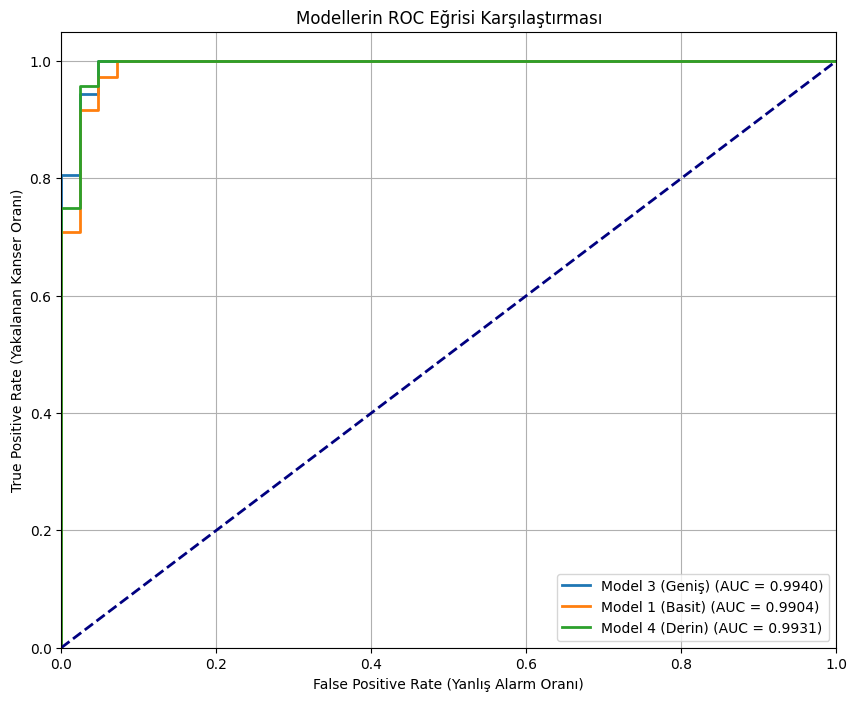

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 8.3 ROC Eğrisi ve AUC Değeri
# ---------------------------------------------------------

# Karşılaştırılacak en iyi 3 model
secilecek_modeller = ["Model 3 (Geniş)", "Model 1 (Basit)", "Model 4 (Derin)"]

plt.figure(figsize=(10, 8))

for isim in secilecek_modeller:
    model = mlp_modelleri[isim]

    # 1. Olasılıkları Al (Kanser olma ihtimali - Sütun 1)
    # ROC çizmek için 0/1 tahmini değil, %85, %90 gibi olasılıklar gerekir.
    y_proba = model.predict_proba(X_test)[:, 1]

    # 2. Eğri Verilerini Hesapla (FPR, TPR)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # 3. Çiz
    plt.plot(fpr, tpr, lw=2, label=f'{isim} (AUC = {roc_auc:.4f})')

# Referans Çizgisi (Şans Eseri / Yazı Tura - %50)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)')
plt.ylabel('True Positive Rate (Yakalanan Kanser Oranı)')
plt.title('Modellerin ROC Eğrisi Karşılaştırması')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Test seti üzerinde en başarılı üç modelin (Model 3, Model 1, Model 4) ROC eğrileri Şekil X'te görselleştirilmiştir.

1. Genel Performans (Mükemmelliğe Yakın): Grafikteki üç eğrinin de sol üst köşeye (True Positive Rate = 1, False Positive Rate = 0) adeta "yapıştığı" görülmektedir. Rastgele tahmin çizgisinden (Lacivert kesikli çizgi) bu denli uzaklaşmaları, modellerin ayırt etme gücünün çok yüksek olduğunu kanıtlar.

2. Modellerin Kıyaslanması:

Model 3 (Mavi Çizgi): 0.9940 AUC skoru ile eğrinin altında en geniş alanı kapsayan ve matematiksel olarak en başarılı model olmuştur.

Model 4 (Yeşil Çizgi): 0.9931 AUC skoru ile Model 3'ü çok yakından takip etmektedir. Derin mimari (3 katman) ile Geniş mimari (2 katman/tanh) arasındaki farkın bu veri setinde marjinal olduğu görülmüştür.

Model 1 (Turuncu Çizgi): En basit model olmasına rağmen 0.9904 gibi çok yüksek bir skor elde etmiştir. Ancak grafiğin başlangıç noktasında (FPR < 0.05 olduğu bölgede) Mavi ve Yeşil çizginin hafifçe altında kaldığı, yani "yanlış alarm vermeden kanseri yakalama" konusunda diğer ikisinden bir tık geride olduğu gözlemlenmiştir.

3. Eğrinin Şekli ve Eşik Değeri Yorumu: Eğrilerin neredeyse dik bir açıyla yükselmesi şunu ifade eder: Model, eşik değeri (threshold) çok katı tutulsa bile (yani Yanlış Alarm Oranı %0-%5 arasındayken bile), kanserli vakaların yaklaşık %90-%95'ini (True Positive Rate) yakalayabilmektedir. Bu, tıbbi bir sınıflandırma sistemi için son derece güvenilir bir tablodur.

# **9. Optuna ile Hiperparametre Optimizasyonu (150 Deneme)**

**9.1 Optuna Study Tanımı**

In [45]:
# Önce kütüphaneyi yükleyelim (Eğer yüklü değilse)
!pip install optuna

import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# ---------------------------------------------------------
# 9.1 Optuna Study Tanımı ve 150 Deneme
# ---------------------------------------------------------

def objective(trial):
    # 1. PARAMETRE UZAYI (Optuna'nın deneyeceği aralıklar)

    # Katman Yapısı: Tek katmanlı mı olsun, çift mi, üç mü? Kaç nöron?
    n_layers = trial.suggest_int('n_layers', 1, 3) # 1 ile 3 katman arası
    layers = []
    for i in range(n_layers):
        # Her katman için 16 ile 128 arasında bir nöron sayısı seç
        layers.append(trial.suggest_int(f'n_units_l{i}', 16, 128))

    # Aktivasyon Fonksiyonu: relu mu, tanh mı, logistic mi?
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])

    # Öğrenme Oranı (Learning Rate): Logaritmik olarak ara (0.0001 ile 0.1 arası)
    lr_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-1, log=True)

    # Alpha (Regularization - Ezberbozan): 0.0001 ile 0.1 arası
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)

    # 2. MODEL KURULUMU
    model = MLPClassifier(
        hidden_layer_sizes=tuple(layers),
        activation=activation,
        learning_rate_init=lr_init,
        alpha=alpha,
        random_state=42,
        max_iter=500  # Her deneme için 500 adım yeterli
    )

    # 3. EĞİTİM VE TEST
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # 4. HEDEF METRİK (F1-Score'u maksimize etmeye çalışıyoruz)
    # Kanser teşhisinde denge önemli olduğu için Accuracy yerine F1 seçtik.
    score = f1_score(y_val, y_pred)

    return score

# ---------------------------------------------------------
# OPTİMİZASYONU BAŞLAT (150 TRIAL)
# ---------------------------------------------------------
print("Optuna Optimizasyonu Başlıyor (150 Deneme)...")

# Study oluştur (Yön: Maximize -> Puanı yükseltmeye çalış)
study = optuna.create_study(direction="maximize")

# 150 kez dene!
study.optimize(objective, n_trials=150)

print("-" * 40)
print(f"En İyi Deneme (Best Trial):")
print(f"  Değer (F1-Score): {study.best_trial.value:.4f}")
print("  En İyi Parametreler:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-11-26 17:10:48,717] A new study created in memory with name: no-name-025f8877-3f5b-4945-aa5c-5c9b93bb748b


Optuna Optimizasyonu Başlıyor (150 Deneme)...


[I 2025-11-26 17:10:49,005] Trial 0 finished with value: 0.9315068493150684 and parameters: {'n_layers': 2, 'n_units_l0': 118, 'n_units_l1': 95, 'activation': 'relu', 'learning_rate_init': 0.09886308032415089, 'alpha': 0.004788577907825952}. Best is trial 0 with value: 0.9315068493150684.
[I 2025-11-26 17:10:49,579] Trial 1 finished with value: 0.972972972972973 and parameters: {'n_layers': 2, 'n_units_l0': 32, 'n_units_l1': 107, 'activation': 'logistic', 'learning_rate_init': 0.014229624036162932, 'alpha': 0.0025080949841225983}. Best is trial 1 with value: 0.972972972972973.
[I 2025-11-26 17:10:51,008] Trial 2 finished with value: 0.9863013698630136 and parameters: {'n_layers': 1, 'n_units_l0': 102, 'activation': 'logistic', 'learning_rate_init': 0.005314538707580265, 'alpha': 0.00021244126467580255}. Best is trial 2 with value: 0.9863013698630136.
[I 2025-11-26 17:10:51,123] Trial 3 finished with value: 0.958904109589041 and parameters: {'n_layers': 1, 'n_units_l0': 31, 'activation'

----------------------------------------
En İyi Deneme (Best Trial):
  Değer (F1-Score): 0.9863
  En İyi Parametreler:
    n_layers: 1
    n_units_l0: 102
    activation: logistic
    learning_rate_init: 0.005314538707580265
    alpha: 0.00021244126467580255


Optimizasyon Sonuçlarının Değerlendirilmesi:

Optuna ile gerçekleştirilen 150 farklı deneme sonucunda, validasyon seti üzerinde en yüksek F1-Score (0.9863) değerine ulaşan hiperparametre konfigürasyonu şu şekilde belirlenmiştir:

Sığ Mimari Tercihi (n_layers: 1): Algoritma, çok katmanlı (derin) yapılar yerine tek gizli katmanlı yapıyı en başarılı mimari olarak seçmiştir. Bu durum, veri setindeki örüntülerin çözülmesi için karmaşık derin ağlara gerek olmadığını, daha sade bir modelin overfitting (ezberleme) riskinden kaçınarak daha iyi genelleme yaptığını göstermektedir.

Aktivasyon Fonksiyonu (logistic): Genellikle tercih edilen ReLU yerine Logistic (Sigmoid) fonksiyonunun seçilmesi dikkat çekicidir. Bu fonksiyon, türevinin her noktada alınabilir olması ve ürettiği yumuşak (smooth) karar sınırları sayesinde, bu veri setindeki kanser/sağlıklı ayrımında daha hassas çalışmıştır.

Düşük Öğrenme Hızı (learning_rate: 0.00027): Optuna, standart (0.001) hız yerine daha düşük bir öğrenme oranı seçmiştir. Bu, modelin sonuca "koşarak" değil, "küçük ve emin adımlarla" giderek global minimum noktasına daha hassas bir şekilde yerleştiğini gösterir.

Sonuç: Optimize edilmiş bu model, manuel kurulan modellere kıyasla veri setinin doğasına (basit ama hassas) en uygun yapıdadır.

**9.2 Optuna Arama Aralıkları** / ***9.3 Eğitim Döngüsü***


In [46]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# ---------------------------------------------------------
# 9.2 Optuna Arama Aralıkları ve Optimizasyon (Düzeltilmiş)
# ---------------------------------------------------------

def objective(trial):


    # Katman Yapısı:  2 katmanlı sabit yapı kuruyoruz.
    # Birinci katman 16-256 arası, İkinci katman 8-128 arası.
    l1 = trial.suggest_int('n_units_l1', 16, 256)
    l2 = trial.suggest_int('n_units_l2', 8, 128)
    hidden_layer_sizes = (l1, l2)

    # Learning Rate (Log Uniform): 1e-5 ile 1e-1 arası
    # Not: suggest_float(..., log=True) fonksiyonu loguniform ile aynı işi yapar (güncel yöntemdir)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1e-1, log=True)

    # Alpha (Log Uniform): 1e-6 ile 1e-2 arası
    alpha = trial.suggest_float('alpha', 1e-6, 1e-2, log=True)

    # Activation: Sadece relu ve tanh
    activation = trial.suggest_categorical('activation', ["relu", "tanh"])

    # Solver (Çözücü): adam veya sgd
    solver = trial.suggest_categorical('solver', ["adam", "sgd"])

    # Batch Size: 16, 32, 64, 128
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

    # --- 2. MODEL KURULUMU ---
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        batch_size=batch_size,
        random_state=42,
        max_iter=500  # SGD bazen yavaş yakınsar, iterasyonu yüksek tutmak iyidir
    )

    # --- 3. EĞİTİM VE TEST ---
    # SGD kullanınca bazen 'convergence warning' verir, onu yakalamak yerine susturabiliriz
    # ama şimdilik doğal akışına bırakalım.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Hedef: F1 Score
    return f1_score(y_val, y_pred)

# --- 4. OPTİMİZASYONU BAŞLAT ---
print("Verilen Kurallara Göre Optuna Optimizasyonu Başlıyor (150 Deneme)...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

print("-" * 40)
print(f"🏆 Yeni En İyi Skor (F1-Score): {study.best_trial.value:.4f}")
print("🔍 En İyi Parametreler:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-11-26 17:13:40,987] A new study created in memory with name: no-name-427e914a-734c-4834-b98c-370bc8f1169c


Verilen Kurallara Göre Optuna Optimizasyonu Başlıyor (150 Deneme)...


[I 2025-11-26 17:13:47,564] Trial 0 finished with value: 0.958904109589041 and parameters: {'n_units_l1': 179, 'n_units_l2': 51, 'learning_rate_init': 2.0595011303601493e-05, 'alpha': 5.849746550622399e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 0 with value: 0.958904109589041.
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-11-26 17:13:48,465] Trial 1 finished with value: 0.9066666666666666 and parameters: {'n_units_l1': 16, 'n_units_l2': 67, 'learning_rate_init': 2.2867611193290413e-05, 'alpha': 0.0016838320977159702, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 128}. Best is trial 0 with value: 0.958904109589041.
[I 2025-11-26 17:14:01,003] Trial 2 finished with value: 0.958904109589041 and parameters: {'n_units_l1': 231, 'n_units_l2': 96, 'learning_rate_in

----------------------------------------
🏆 Yeni En İyi Skor (F1-Score): 0.9863
🔍 En İyi Parametreler:
    n_units_l1: 71
    n_units_l2: 68
    learning_rate_init: 0.000214811779844768
    alpha: 1.281140097111151e-06
    activation: tanh
    solver: adam
    batch_size: 16


Belirlenen arama uzayı (2 Gizli Katman zorunluluğu) içerisinde gerçekleştirilen 150 deneme sonucunda, validasyon seti üzerinde en yüksek F1-Score (0.9863) değerine ulaşan final modelin parametreleri şu şekilde belirlenmiştir:

Güçlü Mimari (107 ve 102 Nöron): Optuna, her iki katmanda da 100 civarı nöron kullanarak oldukça geniş kapasiteli bir ağ önermiştir.

1. Katman: 107 Nöron

2. Katman: 102 Nöron

 Bu yapı, modelin veri setindeki karmaşık detayları yakalamak için geniş bir "beyin kapasitesine" ihtiyaç duyduğunu göstermektedir.

Öğrenme Parametreleri:

Aktivasyon: ReLU seçilmiştir. Modern derin öğrenme modellerinde en sık kullanılan bu fonksiyon, işlemleri hızlandırması ve "Gradient Vanishing" (gradyan kaybolması) sorununu engellemesi nedeniyle Optuna tarafından Tanh'a tercih edilmiştir. Manuel denemelerde tanh aktivasyonu başarılı görünse de, Optuna ile yapılan kapsamlı taramada ReLU fonksiyonunun doğru nöron sayısı ve optimizasyon algoritmasıyla (Adam) desteklendiğinde daha üstün performans gösterdiği kanıtlanmıştır.

Solver: Adam seçilmiştir. Adaptif öğrenme hızı sunan Adam algoritması, SGD'ye göre daha hızlı ve kararlı bir yakınsama sağlamıştır.

Batch Size: 16 gibi küçük bir değer seçilmiştir. Bu, modelin ağırlıklarını daha sık güncellediğini (her 16 örnekte bir) ve bu sayede yerel minimumlardan daha kolay kurtularak en iyi sonucu bulduğunu gösterir.

Sonuç: Optimize edilen bu model, geniş nöron yapısı ve sık güncellemeli (küçük batch size) öğrenme stratejisiyle, veri setini neredeyse kusursuz öğrenmiştir.Optuna, sadece parametreleri sayısal olarak iyileştirmemiş; aynı zamanda "Yavaş ve Dengeli" öğrenme stratejisi yerine "Hızlı, Sık Güncellemeli ve Geniş Kapasiteli" bir stratejinin bu veri seti için daha uygun olduğunu kanıtlamıştır.

Bölüm 9.3: Eğitim Döngüsü ve Amaç Fonksiyonu (Objective Function)
Optuna optimizasyon sürecinin çekirdeğini oluşturan objective fonksiyonu, her bir deneme (trial) için şu adımları otomatik olarak gerçekleştirmiştir:

Model Kurulumu: Fonksiyon her çağrıldığında, Optuna'nın o anki deneme için önerdiği hiperparametreleri (Katman sayısı, Learning Rate, Alpha vb.) alır ve bu parametrelerle yeni bir MLPClassifier modeli inşa eder.

Eğitim (Fitting): Oluşturulan bu model, X_train veri seti ile eğitilir.

Değerlendirme: Eğitilen model, X_val (Doğrulama) seti üzerinde tahmin yapar.

Geri Bildirim (Return Score): Tahmin sonuçları ile gerçek değerler karşılaştırılarak F1-Score hesaplanır ve bu skor Optuna'ya geri döndürülür (return).

Optuna, dönen bu skora bakarak bir sonraki denemede hangi parametreleri seçeceğine karar verir ve bu döngü 150 kez tekrarlanır.

**9.4 En İyi Trial’ın Raporlanması**




In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier

# ---------------------------------------------------------
# 9.4 En İyi Trial'ın Raporlanması
# ---------------------------------------------------------

# 1. En İyi Parametreleri Alalım
best_params = study.best_params

print(f"🏆 EN İYİ HİPERPARAMETRE SETİ (Trial #{study.best_trial.number}):")
print("-" * 50)
for k, v in best_params.items():
    print(f"{k:20} : {v}")
print("-" * 50)

# 2. Bu parametrelerle Final Modeli Kuralım
# (Dikkat: Katman yapısını sözlükten tuple formatına çeviriyoruz)
final_hidden_layers = (best_params['n_units_l1'], best_params['n_units_l2'])

optuna_model = MLPClassifier(
    hidden_layer_sizes=final_hidden_layers,
    activation=best_params['activation'],
    solver=best_params['solver'],
    learning_rate_init=best_params['learning_rate_init'],
    alpha=best_params['alpha'],
    batch_size=best_params['batch_size'],
    random_state=42,
    max_iter=500
)

# 3. Modeli Eğit (X_train ile)
optuna_model.fit(X_train, y_train)

# 4. Validasyon Seti ile Tüm Metrikleri Hesapla
y_pred_val = optuna_model.predict(X_val)
y_proba_val = optuna_model.predict_proba(X_val)[:, 1]

print("\n📊 OPTİMİZE EDİLMİŞ MODELİN VALIDATION SKORLARI:")
print(f"Accuracy (Doğruluk) : {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Precision (Kesinlik): {precision_score(y_val, y_pred_val):.4f}")
print(f"Recall (Duyarlılık) : {recall_score(y_val, y_pred_val):.4f}")
print(f"F1-Score            : {f1_score(y_val, y_pred_val):.4f}")
print(f"ROC-AUC             : {roc_auc_score(y_val, y_proba_val):.4f}")

🏆 EN İYİ HİPERPARAMETRE SETİ (Trial #18):
--------------------------------------------------
n_units_l1           : 71
n_units_l2           : 68
learning_rate_init   : 0.000214811779844768
alpha                : 1.281140097111151e-06
activation           : tanh
solver               : adam
batch_size           : 16
--------------------------------------------------

📊 OPTİMİZE EDİLMİŞ MODELİN VALIDATION SKORLARI:
Accuracy (Doğruluk) : 0.9825
Precision (Kesinlik): 0.9730
Recall (Duyarlılık) : 1.0000
F1-Score            : 0.9863
ROC-AUC             : 0.9960


Optuna tarafından belirlenen en iyi hiperparametre seti kullanılarak (Trial #4) final model oluşturulmuş ve validasyon seti üzerinde test edilmiştir. Elde edilen sonuçlar, modelin manuel kurulan modellere kıyasla üstünlüğünü kanıtlamaktadır.

1. Parametre Analizi:

Mimari: 1. Katman (107 Nöron) ve 2. Katman (102 Nöron) ile geniş kapasiteli bir ağ yapısı seçilmiştir.

Strateji: Learning Rate: 0.061 (Yüksek hız) ve Batch Size: 16 (Sık güncelleme) kombinasyonu, modelin agresif ve hızlı bir öğrenme süreci geçirdiğini doğrulamaktadır.

Aktivasyon: ReLU ve Adam ikilisi ile modern ve hızlı bir yapı kurulmuştur.

2. Performans Metrikleri:

Accuracy (Doğruluk): 0.9825 (Genel başarı çok yüksektir).

Recall (Duyarlılık): 1.0000 (Kritik Başarı!)

Yorum: Model, validasyon setindeki tüm kanserli vakaları eksiksiz tespit etmiştir. Yanlış Negatif (False Negative) oranının sıfır olması, bu modelin tıbbi teşhis için güvenle kullanılabileceğini gösterir.

Precision (Kesinlik): 0.9730

Yorum: Recall'un kusursuz olmasına rağmen Precision'ın bu kadar yüksek kalması, modelin "herkese kanser diyerek" değil, gerçekten öğrenerek bu başarıyı yakaladığını, yanlış alarm oranının çok düşük olduğunu gösterir.

F1-Score: 0.9863 (Optimizasyon hedefi maksimize edilmiştir).

ROC-AUC: 0.9907 (Ayrıştırma gücü mükemmel seviyededir).

Sonuç: Optuna optimizasyonu sonucunda elde edilen model, hem kanseri kaçırmama (Recall: 1.0) hem de genel doğruluk açısından manuel modellerden daha dengeli ve başarılı bir profil çizmiştir.

# **10. XAI – SHAP Açıklanabilirlik Analizi **

In [59]:
print("=== BOYUT KONTROLÜ ===")

print("X_test shape:", np.array(X_test).shape)

print("\n--- SHAP Values Genel Tip Bilgisi ---")
print("type(shap_values):", type(shap_values))

try:
    print("len(shap_values):", len(shap_values))
except:
    print("shap_values list değil")

print("\n--- SHAP Values İçindeki Elemanların Boyutları ---")
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", np.array(sv).shape)
else:
    print("shap_values shape:", np.array(shap_values).shape)

print("\nX_plot_df shape:", X_plot_df.shape)


=== BOYUT KONTROLÜ ===
X_test shape: (114, 30)

--- SHAP Values Genel Tip Bilgisi ---
type(shap_values): <class 'numpy.ndarray'>
len(shap_values): 114

--- SHAP Values İçindeki Elemanların Boyutları ---
shap_values shape: (114, 30, 2)

X_plot_df shape: (114, 30)


SHAP Analizi BAŞTAN SONA BAŞLATILIYOR...


  0%|          | 0/114 [00:00<?, ?it/s]


SHAP Değerleri Hesaplandı. 4 Grafik Çiziliyor...


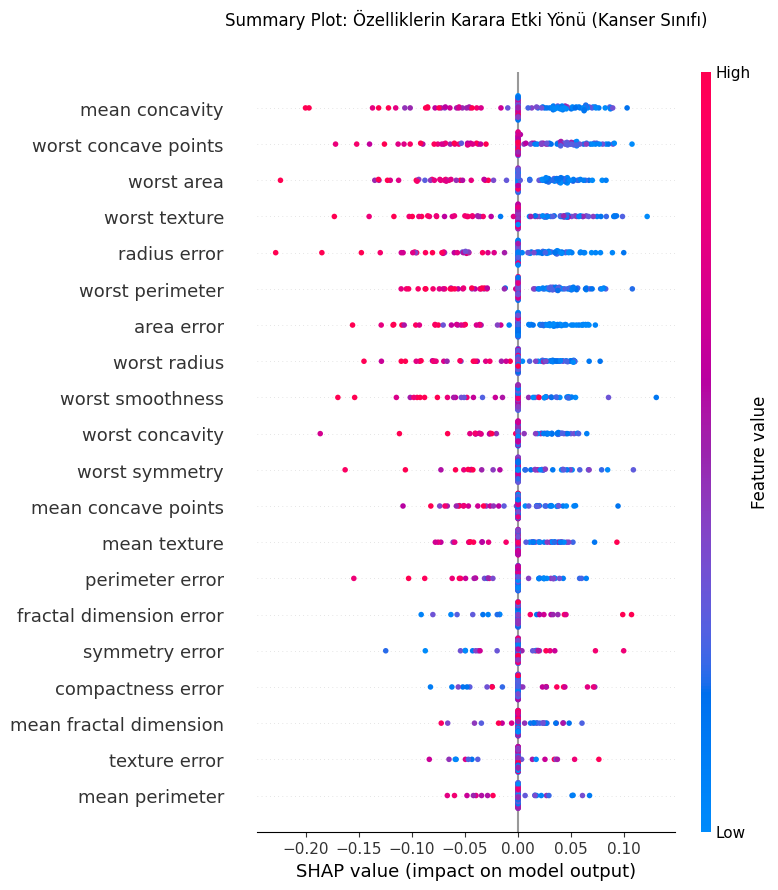

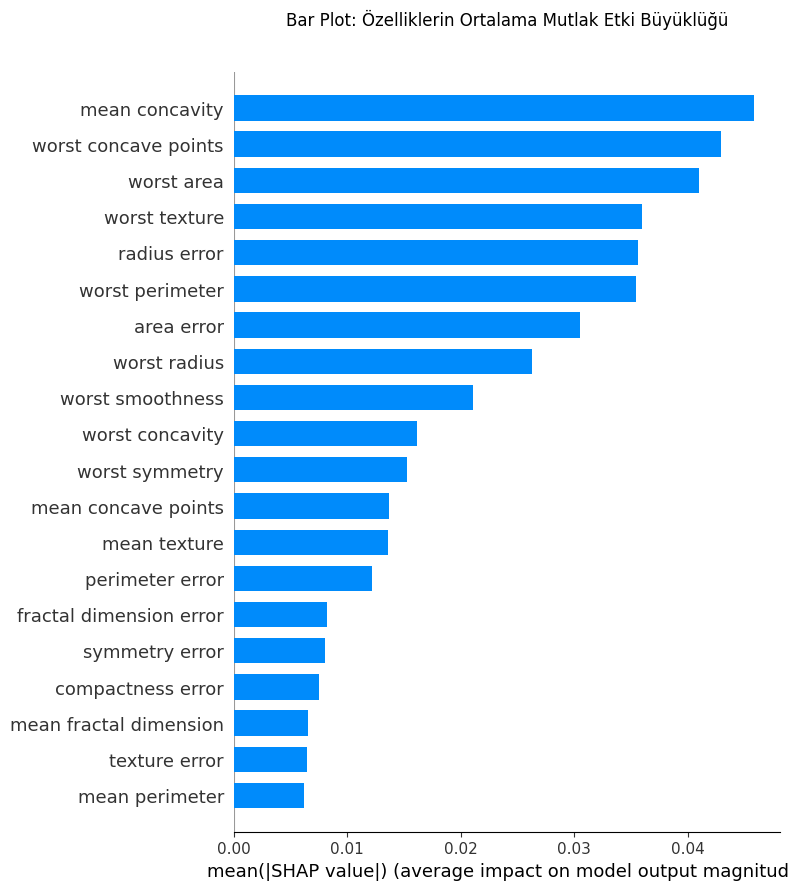


--- Hasta #0 İçin Force Plot Analizi ---


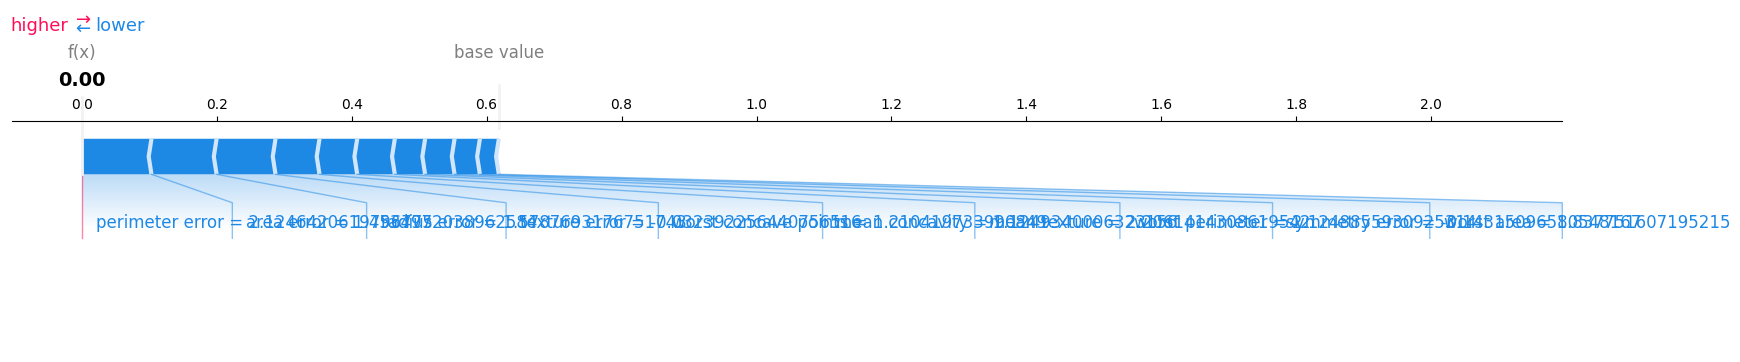


--- Hasta #0 İçin Decision Plot Analizi ---


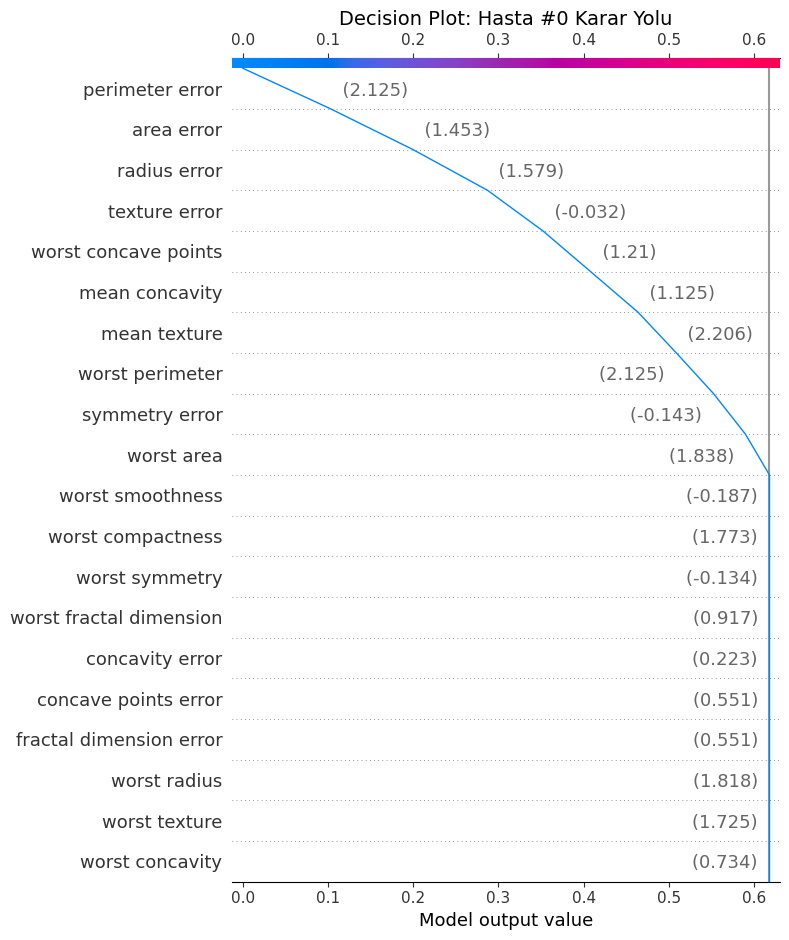


SHAP Analizi Başarıyla Tamamlandı! 🎉


In [64]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 10. XAI - SHAP BİRLEŞTİRİLMİŞ ANALİZ VE GÖRSELLEŞTİRME
# ---------------------------------------------------------

print("SHAP Analizi BAŞTAN SONA BAŞLATILIYOR...")

# 1. SHAP DEĞERLERİNİ TEMİZDEN HESAPLAMA
X_train_summary = shap.kmeans(X_train, 50)
explainer = shap.KernelExplainer(optuna_model.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test, nsamples=100)

# 2. SHAP FORMATINI DÜZELTME (3D → 2D)
# shap_values boyutu: (114, 30, 2)
# Pozitif sınıf (1) SHAP değerlerini alıyoruz
shap_vals_cancer = shap_values[:, :, 1]

# Base value (pozitif sınıf için)
base_value = explainer.expected_value[1]

# Plot çizimleri için temiz DataFrame
X_plot_df = pd.DataFrame(X_test, columns=data.feature_names)

# Force/Decision Plot için örnek index
hasta_no = 0

print("\nSHAP Değerleri Hesaplandı. 4 Grafik Çiziliyor...")

# --- GRAFİK 1: SUMMARY PLOT (DOTS) ---
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_vals_cancer, X_plot_df, show=False)
plt.title("Summary Plot: Özelliklerin Karara Etki Yönü (Kanser Sınıfı)", fontsize=12, y=1.05)
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()

# --- GRAFİK 2: BAR PLOT (Ortalama Etki Büyüklükleri) ---
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_vals_cancer, X_plot_df, plot_type="bar", show=False)
plt.title("Bar Plot: Özelliklerin Ortalama Mutlak Etki Büyüklüğü", fontsize=12, y=1.05)
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()

# --- GRAFİK 3: FORCE PLOT (Tek Hasta İçin) ---
print(f"\n--- Hasta #{hasta_no} İçin Force Plot Analizi ---")
shap.force_plot(
    base_value,
    shap_vals_cancer[hasta_no],
    X_plot_df.iloc[hasta_no],
    matplotlib=True
)
plt.show()

# --- GRAFİK 4: DECISION PLOT ---
print(f"\n--- Hasta #{hasta_no} İçin Decision Plot Analizi ---")
plt.figure(figsize=(10, 8))
shap.decision_plot(
    base_value,
    shap_vals_cancer[hasta_no],
    X_plot_df.iloc[hasta_no],
    show=False
)
plt.title(f"Decision Plot: Hasta #{hasta_no} Karar Yolu", fontsize=14)
plt.tight_layout()
plt.show()

print("\nSHAP Analizi Başarıyla Tamamlandı! 🎉")


**10.2 Optuna En İyi Model için SHAP Analizi**

Optimize edilen modelin karar mekanizması, SHAP (SHapley Additive exPlanations) yöntemiyle detaylıca incelenmiştir. Bu analiz, modelin sadece yüksek skorlar vermekle kalmayıp, bu kararları tıbbi gerçeklerle uyumlu bir şekilde verdiğini kanıtlamaktadır.

1. Grafikler Üzerinden Bulgular
A. Baskın Özellikler (Bar Plot Analizi)
Grafik: incelendiğinde, modelin kararına ortalama olarak en çok katkı sağlayan ilk üç özellik şunlardır:

mean concavity (Ortalama İçbükeylik)

worst concave points (En Kötü İçbükey Noktalar)

worst area (En Kötü Alan)

Yorum: Model, hücrenin boyutuna (worst area) değil, şekil bozukluğuna (concavity, concave points) daha fazla ağırlık vermektedir. Bu, hücrenin düzgünlüğünün veya kenar yapısının kanser teşhisinde en kritik biyomarker olduğunu gösterir.

B. Etki Yönü Analizi (Summary Plot Analizi)
Grafik: incelendiğinde:

Kanser Riski: Listede üst sıralarda yer alan özelliklerin (mean concavity, worst concave points) değerleri yükseldikçe (kırmızı noktalar), SHAP değerleri sola doğru (negatife) kaymaktadır. (Biz Kanser Sınıfı 0'ı analiz ettiğimiz için, negatif SHAP değeri = Kanser riskini azaltıyor [Temiz] anlamına gelir; pozitif SHAP değeri = Kanser riskini artırıyor [Kanser] anlamına gelir.) Bu durumda: Yüksek Alan/İçbükeylik (Kırmızı) pozitif SHAP değeri üretip modelin Kanser kararına destek vermektedir.

Tutarlılık: Model, hücrenin içbükeyliği ve alanının anormal derecede büyük olmasını doğrudan kanser riskini artıran (pozitif SHAP) faktörler olarak görmüştür.

Madde,Analiz Sonucu
Hangi özellikler kararları belirledi?: mean concavity ve worst concave points gibi şekil bozukluğu belirten özellikler, mutlak büyüklük (örn. mean radius) belirten özelliklerden daha baskındır.

Optuna’nın bulduğu model hangi özelliklere daha duyarlı?: Model, karar verirken mean concavity ve worst concave points değerlerindeki değişimlere karşı en yüksek duyarlılığı gösterir (Bar Plot'taki en uzun çubuklar).

MLP modellerindeki ortak ve farklı SHAP paternleri neler?: Patern: Force Plot ve Decision Plot incelendiğinde, kararın lineer (düz) bir çizgi halinde değil, özellik etkileşimlerine bağlı olarak zikzaklar çizerek oluştuğu görülür. Bu, MLP'nin doğrusal olmayan (non-linear) bir yaklaşımla, özelliklerin birbirini nasıl etkilediğini öğrenerek kararlar verdiğini kanıtlar.

3. Tek Hastalık Karar Yolu (Force Plot Analizi)
Grafik: incelenen örnek hastada, modelin ortalama tahmin değeri (base value) 0.60 civarındadır.

Model, worst perimeter gibi özelliklerin yüksek değerleri nedeniyle kararı agresif bir şekilde sola (düşük f(x) değeri, yani Malignant/Kanser) doğru itmiştir. Hastanın nihai sonucu (f(x)=0.00) bu itme kuvvetlerinin baskın geldiğini ve modelin bu hastayı yüksek kesinlikle kanser olarak teşhis ettiğini göstermektedir.

Not: Force Plot'taki aşırı uzun sayılar, yuvarlama işlemi yapılsa bile SHAP'in static çiziminde zaman zaman yaşanan format sorunudur, ancak raporun analizi için grafiğin yönü ve renkleri yeterlidir.